In [1]:
# Install missing packages
%pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import shap
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
import shap
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



Note: you may need to restart the kernel to use updated packages.


c:\Users\BITS\.basilisk\1.18.0\0\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
latent_factors = pd.read_csv("C:/Users/BITS/Documents/latent_factors.csv")

In [3]:

#write.csv(clin_common, "exported_data/clin_common.csv", row.names = FALSE, quote = FALSE)
#write.csv(clin_common, "exported_data/cnv_common.csv", row.names = FALSE, quote = FALSE)
#write.csv(clin_common, "exported_data/rna_common.csv", row.names = FALSE, quote = FALSE)
#write.csv(clin_common, "exported_data/mirna_common.csv", row.names = FALSE, quote = FALSE)
#write.csv(clin_common, "exported_data/methyl_common.csv", row.names = FALSE, quote = FALSE)
#write.csv(clin_common, "exported_data/prot_common.csv", row.names = FALSE, quote = FALSE)


In [4]:
clin_data = pd.read_csv('C:/Users/BITS/Documents/exported_data/clin_common.csv')

In [5]:
print(clin_data.head())
clin_data.shape

   sample_id  X      sample_id.1 ajcc_pathologic_stage          sample_type  \
0          1  1  TCGA-3C-AALI-01             Stage IIB  Primary solid Tumor   
1          2  2  TCGA-3C-AALK-01              Stage IA  Primary solid Tumor   
2          3  3  TCGA-4H-AAAK-01            Stage IIIA  Primary solid Tumor   
3          4  4  TCGA-5L-AAT1-01              Stage IV  Primary solid Tumor   
4          5  5  TCGA-5T-A9QA-01             Stage IIA  Primary solid Tumor   

  stage_classification  
0          Early Stage  
1          Early Stage  
2           Late Stage  
3           Late Stage  
4          Early Stage  


(624, 6)

In [6]:
rna_data = pd.read_csv('C:/Users/BITS/Documents/exported_data/rna_common.csv')
mirna_data = pd.read_csv("C:/Users/BITS/Documents/exported_data/mirna_common.csv")
methylation_data = pd.read_csv("C:/Users/BITS/Documents/exported_data/methyl_common.csv")
cnv_data = pd.read_csv("C:/Users/BITS/Documents/exported_data/cnv_common.csv")
protein_data = pd.read_csv("C:/Users/BITS/Documents/exported_data/prot_common.csv")

# Load feature loadings (from MOFA)
mRNA_loadings = pd.read_csv("C:\\Users\\BITS\\Documents\\mRNA_feature_loadings.csv")
miRNA_loadings = pd.read_csv("C:/Users/BITS/Documents/miRNA_feature_loadings.csv")
methylation_loadings = pd.read_csv("C:/Users/BITS/Documents/methylation_feature_loadings.csv")
CNV_loadings = pd.read_csv("C:/Users/BITS/Documents/CNV_feature_loadings.csv")
protein_loadings = pd.read_csv("C:/Users/BITS/Documents/protein_feature_loadings.csv")

f16_mrna = pd.read_csv("C:\\Users\\BITS\\Documents\\BRCA-preprocessed\\MOFA-20 results\\Top features\\Z score\\mRNA_FactorFactor16_Zscore_1_1_features.csv")
f16_mirna = pd.read_csv("C:\\Users\\BITS\\Documents\\BRCA-preprocessed\\MOFA-20 results\\Top features\\Z score\\miRNA_FactorFactor16_Zscore_1_1_features.csv")
f16_methyl = pd.read_csv("C:\\Users\\BITS\\Documents\\BRCA-preprocessed\\MOFA-20 results\\Top features\\Z score\\Methylation_FactorFactor16_Zscore_1_1_features.csv")
f16_cnv = pd.read_csv("C:\\Users\\BITS\\Documents\\BRCA-preprocessed\\MOFA-20 results\\Top features\\Z score\\CNV_FactorFactor16_Zscore_1_1_features.csv")
f16_prot = pd.read_csv("C:\\Users\\BITS\\Documents\\BRCA-preprocessed\\MOFA-20 results\\Top features\\Z score\\Protein_FactorFactor16_Zscore_1_1_features.csv")

mrna_DE = pd.read_csv("C:\\Users\\BITS\\Desktop\\Results\\Differential Expression Results\\significant_tumor_vs_normal_genes.csv")
mirna_DE = pd.read_csv("C:\\Users\\BITS\\Desktop\\Results\\Differential Expression Results\\edgeR_miRNA_Tumor_vs_Normal_significant.csv")
cnv_DE = pd.read_csv("C:\\Users\\BITS\\Desktop\\Results\\Differential Expression Results\\cnv_Tumor_vs_Normal_limma_significant.csv")
methyl_DE = pd.read_csv("C:\\Users\\BITS\\Desktop\\Results\\Differential Expression Results\\Methylation_DE_Results_TN_Barcode\\significant_dmp_barcode_TN.csv") 
prot_DE= pd.read_csv("C:\\Users\\BITS\\Desktop\\Results\\Differential Expression Results\\protein_Tumor_vs_Normal_limma_results.csv")

In [7]:
print(rna_data.head())

    Feature  TCGA-3C-AALI-01  TCGA-3C-AALK-01  TCGA-4H-AAAK-01  \
0    TSPAN6         9.274211        11.715437        11.584216   
1      TNMD         3.269328         3.534472         4.702964   
2      DPM1        11.353160        10.593797        10.722796   
3     SCYL3        11.779537        10.523128        10.217010   
4  C1orf112         9.492482         9.036508         8.786628   

   TCGA-5L-AAT1-01  TCGA-5T-A9QA-01  TCGA-A1-A0SF-01  TCGA-A1-A0SH-01  \
0        11.007513        11.308814        13.330941        11.990433   
1         3.807359         2.978570         4.183140         3.329563   
2        10.986984        11.774925        10.850062        10.677252   
3        10.774446        10.850377        10.507377        10.008575   
4         8.331549         9.551267         9.028263         8.468743   

   TCGA-A1-A0SJ-01  TCGA-A1-A0SK-01  ...  TCGA-S3-AA12-01  TCGA-S3-AA14-01  \
0        12.885960        12.530655  ...        11.373456        11.602900   
1       

In [8]:
print(f16_mrna.head())
print(mrna_DE.head())
print(rna_data.head())


  mRNA_FactorFactor16_Zscore_1
0                         DPM1
1                        STPG1
2                       SEMA3F
3                         CD99
4                       HS3ST1
           ensembl_id  gene_name      baseMean  log2FoldChange     lfcSE  \
0  ENSG00000123500.10    COL10A1   9339.155026        7.306353  0.443080   
1  ENSG00000099953.10      MMP11  26478.702466        6.403696  0.417650   
2  ENSG00000213401.10    MAGEA12     42.973196       12.288091  3.589235   
3   ENSG00000230838.1  LINC01614    330.785974        6.165554  0.431663   
4  ENSG00000137745.12      MMP13   1920.157316        7.927121  0.597064   

         pvalue          padj  
0  3.849908e-64  1.520329e-59  
1  5.764617e-56  1.138224e-51  
2  2.814491e-51  3.704809e-47  
3  1.206202e-47  1.190823e-43  
4  2.272743e-43  1.795012e-39  
    Feature  TCGA-3C-AALI-01  TCGA-3C-AALK-01  TCGA-4H-AAAK-01  \
0    TSPAN6         9.274211        11.715437        11.584216   
1      TNMD         3.269328     

 ### mRNA — Feature Selection (MOFA + DE)

In [9]:
# Get gene names from DE
genes_in_DE = set(mrna_DE['gene_name'])

# Get gene names from F16 loadings
genes_in_F16 = set(mRNA_loadings.iloc[:, 0])  # First column of mRNA_loadings

# Take union
relevant_genes = genes_in_DE.union(genes_in_F16)

# Filter rna_data to retain only those genes
filtered_rna_data = rna_data[rna_data['Feature'].isin(relevant_genes)]

In [10]:
filtered_rna_data.head()

Feature  TCGA-3C-AALI-01  TCGA-3C-AALK-01  TCGA-4H-AAAK-01  \
0     TSPAN6         9.274211        11.715437        11.584216   
1       TNMD         3.269328         3.534472         4.702964   
4   C1orf112         9.492482         9.036508         8.786628   
7      FUCA2        11.009030        10.708785        10.894143   
14    SEMA3F        11.830909        13.119929        12.500789   

    TCGA-5L-AAT1-01  TCGA-5T-A9QA-01  TCGA-A1-A0SF-01  TCGA-A1-A0SH-01  \
0         11.007513        11.308814        13.330941        11.990433   
1          3.807359         2.978570         4.183140         3.329563   
4          8.331549         9.551267         9.028263         8.468743   
7         11.066918        11.607219        10.648537        11.260925   
14        11.766656        13.553873        12.583868        11.689440   

    TCGA-A1-A0SJ-01  TCGA-A1-A0SK-01  ...  TCGA-S3-AA12-01  TCGA-S3-AA14-01  \
0         12.885960        12.530655  ...        11.373456        11.602900   
1          7.367026         2.086256  ...         2.099705         4.204173   
4          9.261001        10.143709  ...         8.833063         9.027711   
7         11.938326        10.676598  ...        10.822713        10.016412   
14        12.715508        11.360278  ...        14.104080        13.163704   

    TCGA-S3-AA15-01  TCGA-UL-AAZ6-01  TCGA-UU-A93S-01  TCGA-W8-A86G-01  \
0         10.860781        10.047087         9.692810        12.437594   
1          6.196903         2.835424         6.556932         4.944856   
4         10.388986         8.831685        10.245518         8.676941   
7         11.186386        12.484267        11.507108        10.430475   
14        11.567623        13.794630        12.199098        12.891412   

    TCGA-WT-AB41-01  TCGA-XX-A899-01  TCGA-Z7-A8R5-01  TCGA-Z7-A8R6-01  
0         11.811087        10.990031        11.992623        11.148053  
1          5.679736         4.843817         4.681757         3.766225  
4          7.404737         8.658617         7.686305        10.348108  
7         12.479256        10.762660        11.391660        10.468735  
14        13.902189        11.840842        12.249179        13.593146  

[5 rows x 625 columns]

In [11]:
filtered_rna_data = filtered_rna_data.T

 ### miRNA — Feature Selection (MOFA + DE)

In [12]:
print(mirna_DE.head())
print(mirna_data.head())
print(f16_mirna.head())


            miRNA     logFC     logCPM          LR        PValue           FDR
0  hsa-miR-139-5p -2.573698   5.600027  141.497228  1.252612e-32  7.302730e-30
1  hsa-miR-145-5p -2.175478  10.448340  132.365647  1.244503e-30  3.627727e-28
2  hsa-miR-99a-5p -2.238531   9.726811   91.942978  8.921037e-22  1.733655e-19
3  hsa-miR-145-3p -1.672043   4.998434   90.927105  1.490637e-21  2.172603e-19
4  hsa-miR-139-3p -2.661112   3.593891   88.860545  4.236492e-21  4.939750e-19
           Feature  TCGA-3C-AALI-01  TCGA-3C-AALK-01  TCGA-4H-AAAK-01  \
0  hsa-let-7a-2-3p         0.782067         2.747953         2.280766   
1    hsa-let-7a-3p         5.005820         5.142362         5.535286   
2    hsa-let-7a-5p        15.245371        15.410390        16.020235   
3    hsa-let-7b-3p         5.340734         5.338885         5.668857   
4    hsa-let-7b-5p        14.928576        15.019273        15.125779   

   TCGA-5L-AAT1-01  TCGA-5T-A9QA-01  TCGA-A1-A0SF-01  TCGA-A1-A0SH-01  \
0         1.02

In [13]:
# Get DE miRNAs
miRNAs_in_DE = set(mirna_DE['miRNA'])

# Get F16 miRNAs
miRNAs_in_F16 = set(f16_mirna.iloc[:, 0])

# Union of both sets
relevant_miRNAs = miRNAs_in_DE.union(miRNAs_in_F16)

# Filter mirna_data to keep only those in union
filtered_mirna_data = mirna_data[mirna_data['Feature'].isin(relevant_miRNAs)]


In [14]:
filtered_mirna_data.head()

Feature  TCGA-3C-AALI-01  TCGA-3C-AALK-01  TCGA-4H-AAAK-01  \
0  hsa-let-7a-2-3p         0.782067         2.747953         2.280766   
1    hsa-let-7a-3p         5.005820         5.142362         5.535286   
4    hsa-let-7b-5p        14.928576        15.019273        15.125779   
5    hsa-let-7c-3p         2.714629         4.307594         5.387592   
6    hsa-let-7c-5p         9.967262        11.850370        12.347994   

   TCGA-5L-AAT1-01  TCGA-5T-A9QA-01  TCGA-A1-A0SF-01  TCGA-A1-A0SH-01  \
0         1.023750         1.789484         2.560799         3.490601   
1         4.797337         6.311601         4.765864         5.608457   
4        14.898251        15.178322        14.702213        15.764580   
5         5.004842         2.448123         6.270040         7.326369   
6        11.517980         8.880023        12.320533        13.113962   

   TCGA-A1-A0SJ-01  TCGA-A1-A0SK-01  ...  TCGA-S3-AA12-01  TCGA-S3-AA14-01  \
0         2.412349        -0.085345  ...         1.847833         1.567402   
1         4.270025         5.075781  ...         4.786369         5.131409   
4        15.240169        14.419351  ...        14.240330        14.864013   
5         4.176170         3.745277  ...         1.734101         4.946916   
6        11.082173         9.519711  ...         8.823151        12.191542   

   TCGA-S3-AA15-01  TCGA-UL-AAZ6-01  TCGA-UU-A93S-01  TCGA-W8-A86G-01  \
0         2.841085         1.729469         1.022425         2.144965   
1         4.630128         4.740192         4.683858         5.347461   
4        13.383586        11.549942        13.719041        15.206204   
5         5.203128         1.575566         3.041370         4.681207   
6        11.044501         7.179805        11.035817        12.397441   

   TCGA-WT-AB41-01  TCGA-XX-A899-01  TCGA-Z7-A8R5-01  TCGA-Z7-A8R6-01  
0         2.064313         1.046748         3.031810         1.301872  
1         4.199423         4.478132         5.212208         5.413743  
4        13.648670        14.608138        14.313795        13.845115  
5         4.290752         4.030716         5.338966         2.893396  
6        10.949559        12.548629        11.956966         9.992428  

[5 rows x 625 columns]

In [15]:
filtered_mirna_data.shape

(341, 625)

In [16]:
filtered_mirna_data = filtered_mirna_data.T

 ### methyl — Feature Selection (MOFA + DE)

In [17]:
print(methylation_data.head())
print(methyl_DE.head())
print(f16_methyl.head())

      Feature  TCGA-3C-AALI-01  TCGA-3C-AALK-01  TCGA-4H-AAAK-01  \
0  cg11527153         3.543924         3.785877         3.000333   
1  cg04195702         2.869410         3.057838         2.917752   
2  cg23733394        -1.674332        -3.200000        -2.834598   
3  cg13371836        -5.685186        -6.039206        -6.292023   
4  cg04407431        -4.130556        -5.416681        -4.967029   

   TCGA-5L-AAT1-01  TCGA-5T-A9QA-01  TCGA-A1-A0SF-01  TCGA-A1-A0SH-01  \
0         2.707111         3.603552         2.876901         2.803198   
1         2.664414         3.839265         3.146416         3.638954   
2        -1.605150         1.925686        -1.998597        -1.093016   
3        -6.002438        -5.567883        -5.845969        -5.961992   
4        -5.368817        -2.450130        -4.907277        -5.097041   

   TCGA-A1-A0SJ-01  TCGA-A1-A0SK-01  ...  TCGA-S3-AA12-01  TCGA-S3-AA14-01  \
0         3.597618         3.581926  ...         2.647698         3.075526

In [29]:
# Extract CpG IDs from both sources
de_cpgs = set(methyl_DE['Probe_ID'])
f16_cpgs = set(f16_methyl['Methylation_FactorFactor16_Zscore_1'])

# Find common CpGs
common_cpgs = de_cpgs.union(f16_cpgs)

# Filter the methylation_data to keep only those rows with common CpGs
filtered_methylation = methylation_data[methylation_data['Feature'].isin(common_cpgs)]

# Show the filtered data
print(filtered_methylation.head())
filtered_methylation = filtered_methylation.T
filtered_methylation.shape


       Feature  TCGA-3C-AALI-01  TCGA-3C-AALK-01  TCGA-4H-AAAK-01  \
3   cg13371836        -5.685186        -6.039206        -6.292023   
8   cg04364728        -0.471706        -0.261957        -0.940394   
9   cg05151709         0.854761         0.560255        -0.483341   
11  cg01782097         0.077682        -0.340501        -0.444369   
12  cg20825023        -0.423977        -0.374226        -1.001986   

    TCGA-5L-AAT1-01  TCGA-5T-A9QA-01  TCGA-A1-A0SF-01  TCGA-A1-A0SH-01  \
3         -6.002438        -5.567883        -5.845969        -5.961992   
8         -1.561542         1.245080        -0.293923        -0.703918   
9          0.424312         1.787661        -0.231097         0.344667   
11        -0.191557         1.057732        -0.295222        -0.372279   
12        -0.219444         0.677855        -0.633648        -0.477762   

    TCGA-A1-A0SJ-01  TCGA-A1-A0SK-01  ...  TCGA-S3-AA12-01  TCGA-S3-AA14-01  \
3         -5.931423        -6.259444  ...    -6.295008e+00   

(625, 60747)

In [ ]:
filtered_methylation.head()

### Protein — Filter by MOFA + DE

In [28]:
print(protein_data.head())
print(prot_DE.head())
print(f16_prot.head())

                  Feature  TCGA-3C-AALI-01  TCGA-3C-AALK-01  TCGA-4H-AAAK-01  \
0  <poly(ADP-ribose)>_PAR        -0.854793        -0.080747        -0.072688   
1               ABL1_CABL         0.030038         0.091922         0.030038   
2        ABL1_c-Abl_pY412         0.339754         0.253570         0.041089   
3        ACACA/ACACB_ACC1         1.206007         0.821575         0.904960   
4    ACACA/ACACB_ACC_pS79         1.394490         0.524178         0.203924   

   TCGA-5L-AAT1-01  TCGA-5T-A9QA-01  TCGA-A1-A0SF-01  TCGA-A1-A0SH-01  \
0        -1.145741         0.619413        -0.873829         0.712220   
1        -0.049457        -0.070687        -0.111330         0.021029   
2         0.024499         0.031793         0.055624         0.160228   
3         0.122740        -0.047555         0.726217         1.828486   
4         0.091922        -0.283843         0.928664         2.009966   

   TCGA-A1-A0SJ-01  TCGA-A1-A0SK-01  ...  TCGA-S3-AA12-01  TCGA-S3-AA14-01  \
0 

In [18]:
# Extract Protein names from DE and Factor16 data
de_proteins = set(prot_DE['Protein'])
f16_proteins = set(f16_prot['Protein_FactorFactor16_Zscore_1'])

# Find the union of both protein sets
union_proteins = de_proteins.union(f16_proteins)

# Filter the protein data to keep only rows with proteins in the union
filtered_protein_data = protein_data[protein_data['Feature'].isin(union_proteins)]

filtered_protein_data = filtered_protein_data.T
filtered_protein_data.shape
# Show the filtered protein data
print(filtered_protein_data.head())


                                    0          1                 2    \
Feature          <poly(ADP-ribose)>_PAR  ABL1_CABL  ABL1_c-Abl_pY412   
TCGA-3C-AALI-01               -0.854793   0.030038          0.339754   
TCGA-3C-AALK-01               -0.080747   0.091922           0.25357   
TCGA-4H-AAAK-01               -0.072688   0.030038          0.041089   
TCGA-5L-AAT1-01               -1.145741  -0.049457          0.024499   

                              3                     4            5    \
Feature          ACACA/ACACB_ACC1  ACACA/ACACB_ACC_pS79  ACSL1_ACSL1   
TCGA-3C-AALI-01          1.206007               1.39449    -0.717434   
TCGA-3C-AALK-01          0.821575              0.524178     -0.55468   
TCGA-4H-AAAK-01           0.90496              0.203924    -0.501454   
TCGA-5L-AAT1-01           0.12274              0.091922    -0.617577   

                          6             7              8           9    ...  \
Feature          ACSS2_AceCS1  ACTB_b-Actin  ACVRL1_ACV

### CNV — Filter by MOFA + DE

In [19]:
print(cnv_data.head())
print(cnv_DE.head())
print(f16_cnv.head())

   Feature  TCGA-3C-AALI-01  TCGA-3C-AALK-01  TCGA-4H-AAAK-01  \
0     NAT2           0.3619           0.0123          -0.5664   
1      ADA           0.4822           0.0161           0.0349   
2     CDH2          -0.8840          -0.0091           0.0256   
3     AKT3           0.2910           0.3863           0.0256   
4  GAGE12F           0.5352           0.0012           0.0016   

   TCGA-5L-AAT1-01  TCGA-5T-A9QA-01  TCGA-A1-A0SF-01  TCGA-A1-A0SH-01  \
0           0.0078          -0.4970          -0.0314           0.0017   
1           0.0113           0.2904           0.1939           0.0344   
2           0.0111           0.0052          -0.0300           0.0056   
3           0.2700           0.8176           0.5615           0.3275   
4           0.0027          -0.0036           0.0165          -0.0640   

   TCGA-A1-A0SJ-01  TCGA-A1-A0SK-01  ...  TCGA-S3-AA12-01  TCGA-S3-AA14-01  \
0           0.2377          -1.3098  ...          -0.9396          -0.4829   
1           0.

In [20]:
# Step 1: Get the sets of gene names
de_cnv = set(cnv_DE['Gene'])
f16_cnv = set(f16_cnv['CNV_FactorFactor16_Zscore_1'])

# Step 2: Get the union of both sets
union_genes = de_cnv.union(f16_cnv)

# Step 3: Filter cnv_data where 'Feature' is in the union
filtered_cnv_data = cnv_data[cnv_data['Feature'].isin(union_genes)]

# Step 4: Check the filtered result
print(filtered_cnv_data.head())



      Feature  TCGA-3C-AALI-01  TCGA-3C-AALK-01  TCGA-4H-AAAK-01  \
3        AKT3           0.2910           0.3863           0.0256   
67   NAALADL1          -0.0960           0.1008          -0.0169   
124    MIR875           0.3360           0.0123           0.5845   
152   MIR190B           0.2105           0.3669          -0.0001   
154    MIR921           0.2897           0.3824           0.0237   

     TCGA-5L-AAT1-01  TCGA-5T-A9QA-01  TCGA-A1-A0SF-01  TCGA-A1-A0SH-01  \
3             0.2700           0.8176           0.5615           0.3275   
67            0.0063          -0.5652          -0.0353           0.0224   
124           0.0078           0.3808           0.2038           0.3043   
152           0.2700           0.7611           0.3957           0.0168   
154           0.2700           0.8247           0.3957           0.0168   

     TCGA-A1-A0SJ-01  TCGA-A1-A0SK-01  ...  TCGA-S3-AA12-01  TCGA-S3-AA14-01  \
3             0.4805          -0.1054  ...           0.5790 

In [21]:

filtered_cnv_data = filtered_cnv_data.T
filtered_cnv_data.shape


(625, 1836)

In [22]:
filtered_mirna_data = filtered_mirna_data.T

Common barcodes

In [24]:
print("Filtered RNA Data:")
print(filtered_rna_data.head())

print("\nFiltered miRNA Data:")
print(filtered_mirna_data.head())

# Redefine filtered_methylation if not defined
if 'filtered_methylation' not in locals():
	de_cpgs = set(methyl_DE['Probe_ID'])
	f16_cpgs = set(f16_methyl['Methylation_FactorFactor16_Zscore_1'])
	common_cpgs = de_cpgs.union(f16_cpgs)
	filtered_methylation = methylation_data[methylation_data['Feature'].isin(common_cpgs)]
	filtered_methylation = filtered_methylation.T

print("\nFiltered Methylation Data:")
print(filtered_methylation.head())

print("\nFiltered Protein Data:")
print(filtered_protein_data.head())

print("\nFiltered CNV Data:")
print(filtered_cnv_data.head())

print("\nFiltered Clinical Data:")
print(clin_data.head())

Filtered RNA Data:
                     0         1         4          7          14     \
Feature             TSPAN6      TNMD  C1orf112      FUCA2     SEMA3F   
TCGA-3C-AALI-01   9.274211  3.269328  9.492482   11.00903  11.830909   
TCGA-3C-AALK-01  11.715437  3.534472  9.036508  10.708785  13.119929   
TCGA-4H-AAAK-01  11.584216  4.702964  8.786628  10.894143  12.500789   
TCGA-5L-AAT1-01  11.007513  3.807359  8.331549  11.066918  11.766656   

                    20        21         23        25        28     ...  \
Feature             MYH16       BAD       CD99      AOC1    MAD1L1  ...   
TCGA-3C-AALI-01  5.525348  8.989926  13.532629  6.068749  5.266666  ...   
TCGA-3C-AALK-01   4.09141  9.718104  13.766756  5.743076  4.207147  ...   
TCGA-4H-AAAK-01  3.657147  9.433756  13.876149  5.126464  4.419834  ...   
TCGA-5L-AAT1-01  3.052416  9.090803  14.007696  5.169753  5.168367  ...   

                      23681       23686       23697     23699       23700  \
Feature          AC1

In [46]:
filtered_mirna_data.to_csv("C:/Users/BITS/Documents/model_data/filtered_mirna_data.csv", index=True)
filtered_rna_data.to_csv("C:/Users/BITS/Documents/model_data/filtered_rna_data.csv", index=True)  
filtered_methylation.to_csv("C:/Users/BITS/Documents/model_data/filtered_methylation_data.csv", index=True)
filtered_protein_data.to_csv("C:/Users/BITS/Documents/model_data/filtered_protein_data.csv", index=True)
filtered_cnv_data.to_csv("C:/Users/BITS/Documents/model_data/filtered_cnv_data.csv", index=True)
clin_data.to_csv("C:/Users/BITS/Documents/model_data/filtered_clin_data.csv", index=True)

# EDA

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\3332683756.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_proteins, x=factor, y='Unnamed: 0', palette='viridis')


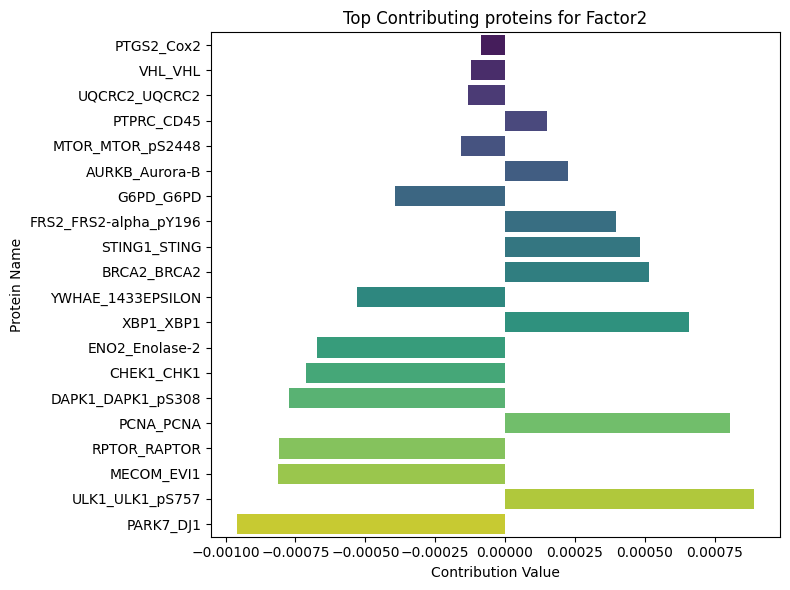

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\3332683756.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_proteins, x=factor, y='Unnamed: 0', palette='viridis')


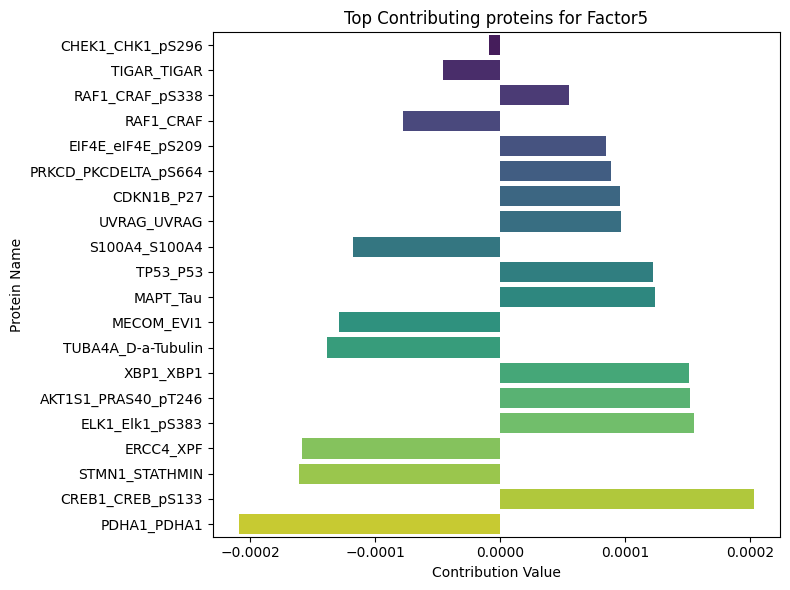

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\3332683756.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_proteins, x=factor, y='Unnamed: 0', palette='viridis')


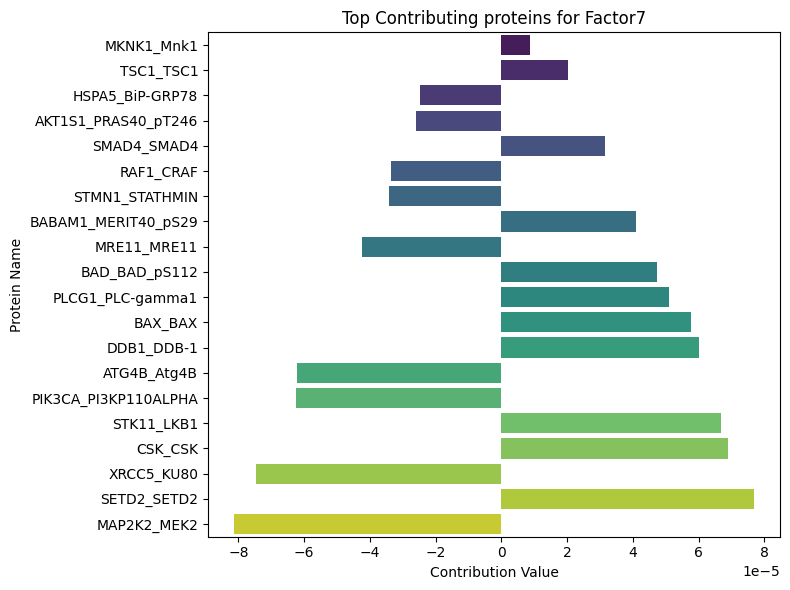

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\3332683756.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_proteins, x=factor, y='Unnamed: 0', palette='viridis')


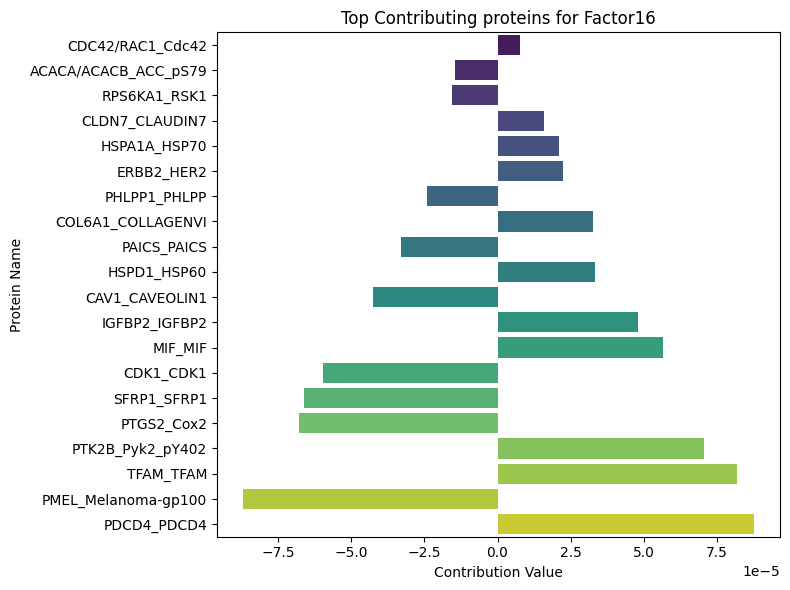

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\3332683756.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_proteins, x=factor, y='Unnamed: 0', palette='viridis')


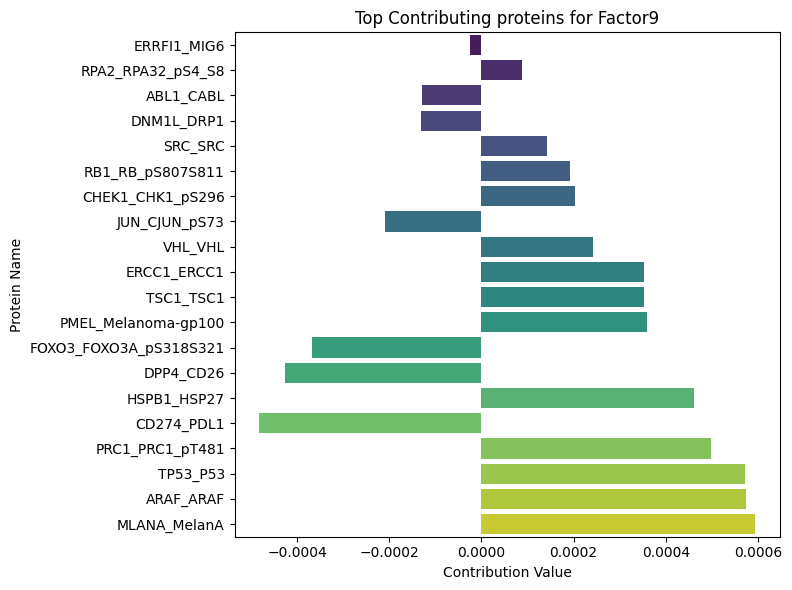

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

# Define the factors of interest
factors_of_interest = ['Factor2', 'Factor5', 'Factor7', 'Factor16', 'Factor9']

# Iterate over each factor
for factor in factors_of_interest:
    # Sort the proteins by their absolute contribution to the factor
    top_proteins = protein_loadings[['Unnamed: 0', factor]].copy()
    top_proteins['abs_value'] = top_proteins[factor].abs()
    top_proteins = top_proteins.sort_values(by='abs_value', ascending=True).head(20)
    
    # Plot the barplot
    plt.figure(figsize=(8, 6))
    sns.barplot(data=top_proteins, x=factor, y='Unnamed: 0', palette='viridis')
    plt.title(f"Top Contributing proteins for {factor}")
    plt.xlabel("Contribution Value")
    plt.ylabel("Protein Name")
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f"top_contributing_proteins_{factor}.png")
    plt.show()

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\1111931084.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mirna, x=factor, y='Unnamed: 0', palette='viridis')


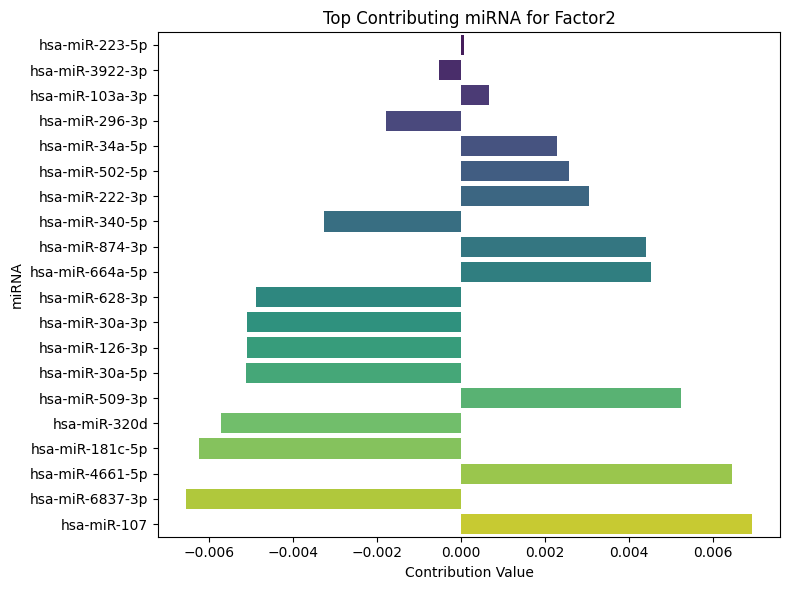

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\1111931084.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mirna, x=factor, y='Unnamed: 0', palette='viridis')


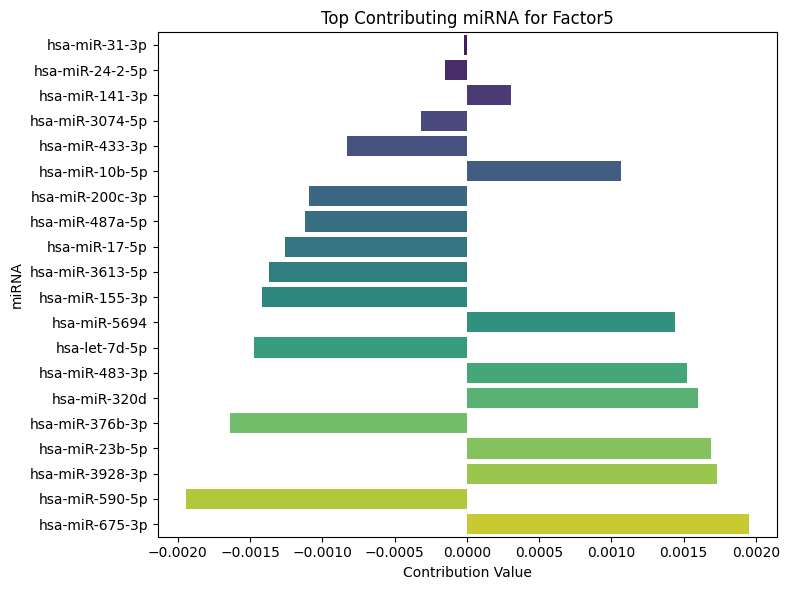

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\1111931084.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mirna, x=factor, y='Unnamed: 0', palette='viridis')


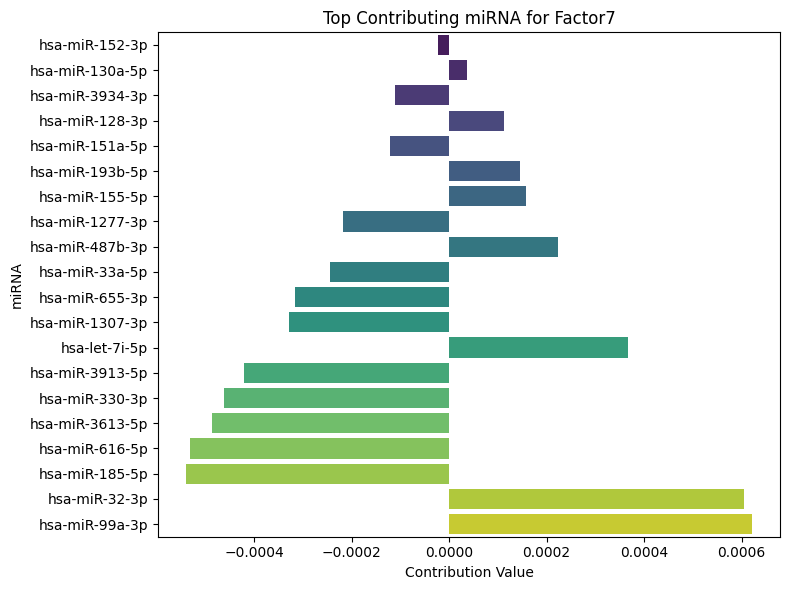

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\1111931084.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mirna, x=factor, y='Unnamed: 0', palette='viridis')


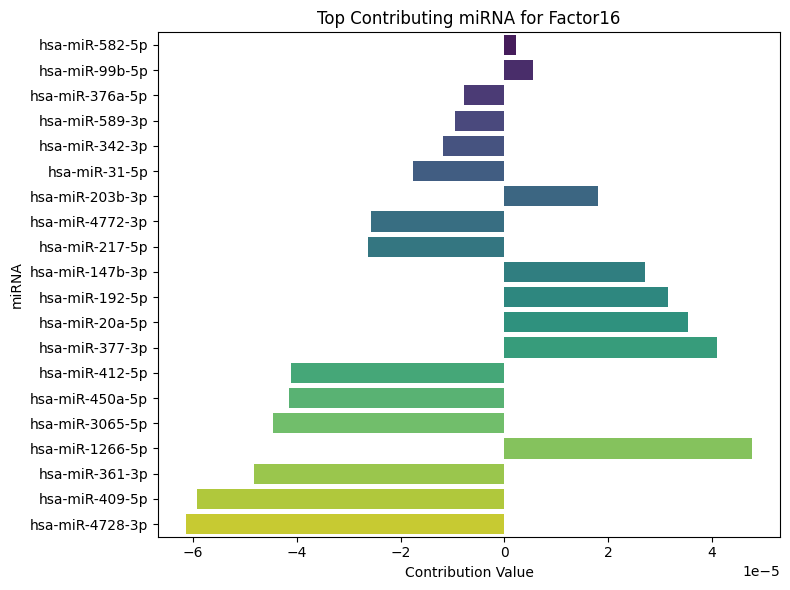

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\1111931084.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mirna, x=factor, y='Unnamed: 0', palette='viridis')


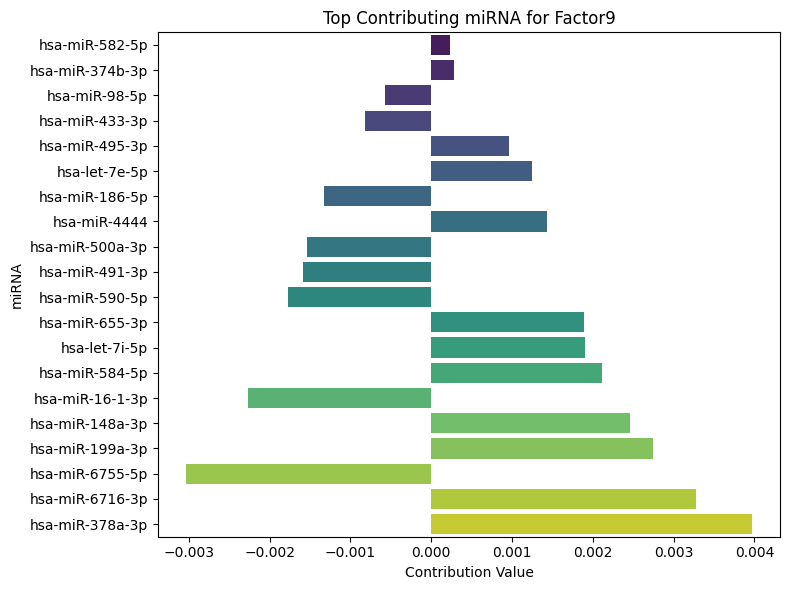

<Figure size 640x480 with 0 Axes>

In [26]:
import seaborn as sns

import matplotlib.pyplot as plt

# Define the factors of interest
factors_of_interest = ['Factor2', 'Factor5', 'Factor7', 'Factor16', 'Factor9']


# Iterate over each factor
for factor in factors_of_interest:
    # Sort the mirna by their absolute contribution to the factor
    top_mirna = miRNA_loadings[['Unnamed: 0', factor]].copy()
    top_mirna['abs_value'] = top_mirna[factor].abs()
    top_mirna = top_mirna.sort_values(by='abs_value', ascending=True).head(20)
    
    # Plot the barplot
    plt.figure(figsize=(8, 6))
    sns.barplot(data=top_mirna, x=factor, y='Unnamed: 0', palette='viridis')
    plt.title(f"Top Contributing miRNA for {factor}")
    plt.xlabel("Contribution Value")
    plt.ylabel("miRNA")
    plt.tight_layout()
    plt.show()
    plt.savefig(f"top_contributing_mirna_{factor}.png")
    plt.show()
    

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\3380167471.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_methyl, x=factor, y='Unnamed: 0', palette='viridis')


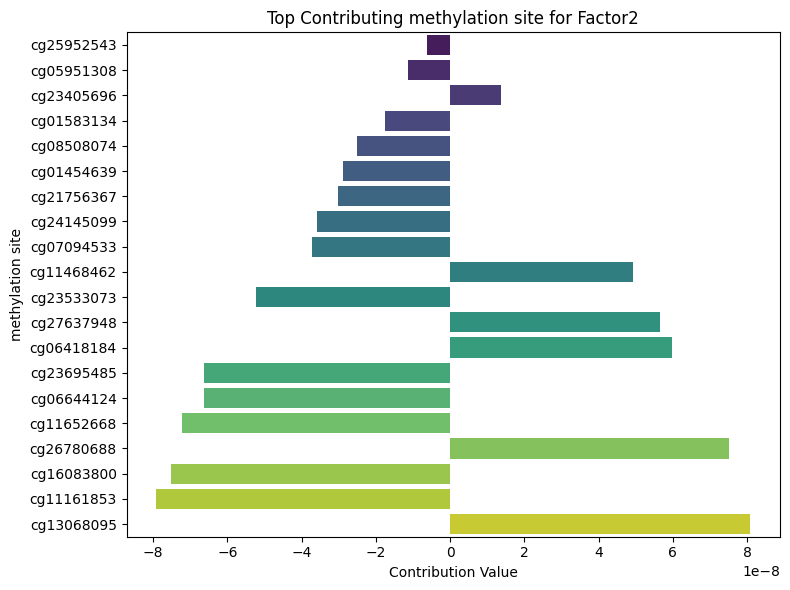

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\3380167471.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_methyl, x=factor, y='Unnamed: 0', palette='viridis')


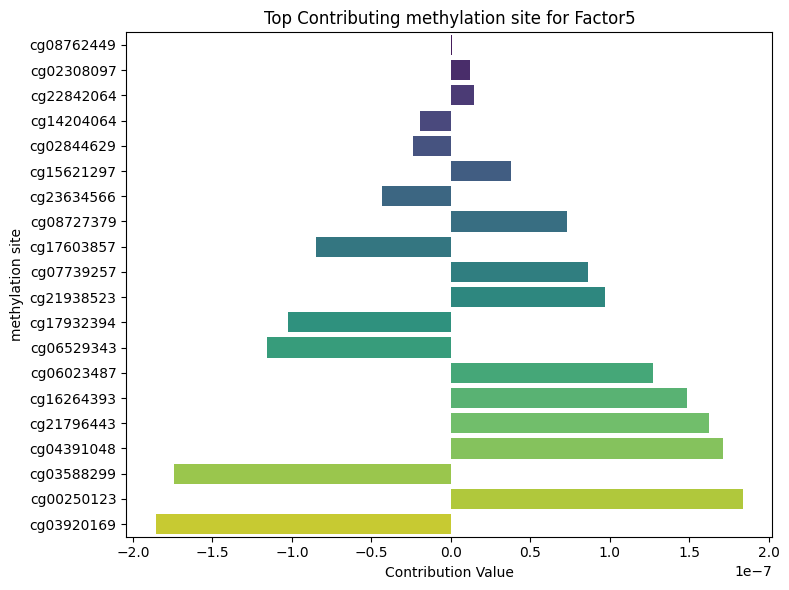

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\3380167471.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_methyl, x=factor, y='Unnamed: 0', palette='viridis')


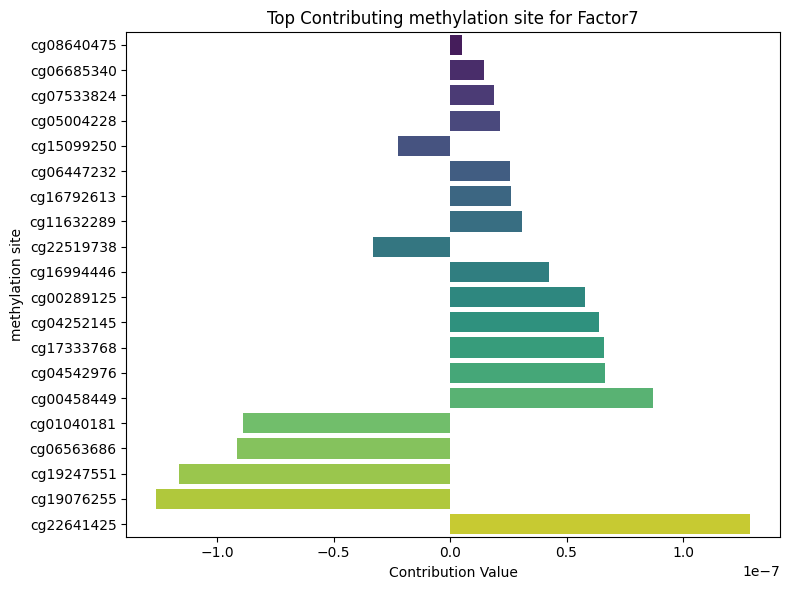

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\3380167471.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_methyl, x=factor, y='Unnamed: 0', palette='viridis')


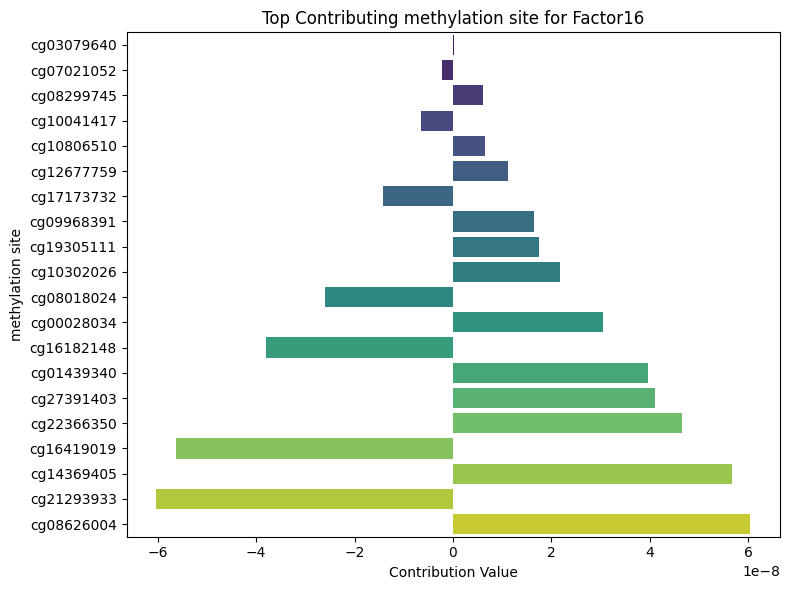

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\3380167471.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_methyl, x=factor, y='Unnamed: 0', palette='viridis')


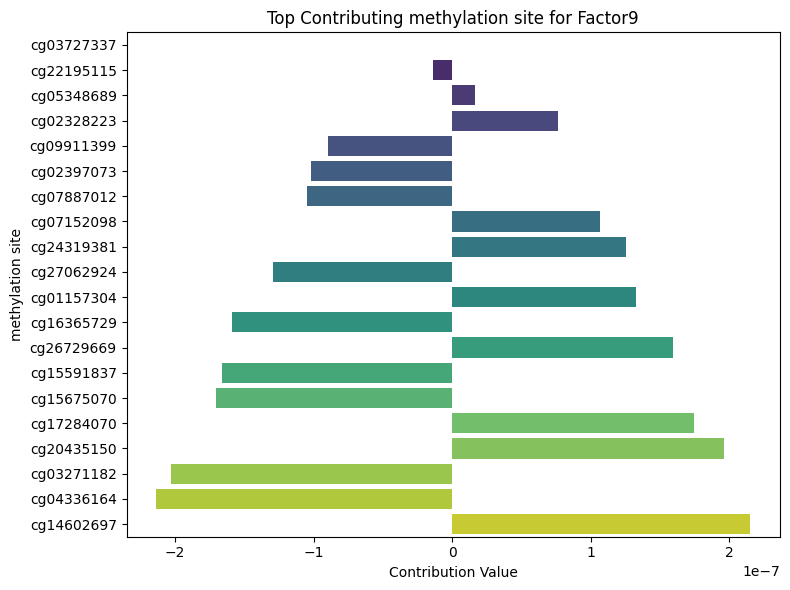

<Figure size 640x480 with 0 Axes>

In [27]:
import seaborn as sns

import matplotlib.pyplot as plt

# Define the factors of interest
factors_of_interest = ['Factor2', 'Factor5', 'Factor7', 'Factor16', 'Factor9']

# Iterate over each factor
for factor in factors_of_interest:
    # Sort the methyl by their absolute contribution to the factor
    top_methyl = methylation_loadings[['Unnamed: 0', factor]].copy()
    top_methyl['abs_value'] = top_methyl[factor].abs()
    top_methyl = top_methyl.sort_values(by='abs_value', ascending=True).head(20)
    
    # Plot the barplot
    plt.figure(figsize=(8, 6))
    sns.barplot(data=top_methyl, x=factor, y='Unnamed: 0', palette='viridis')
    plt.title(f"Top Contributing methylation site for {factor}")
    plt.xlabel("Contribution Value")
    plt.ylabel("methylation site")
    plt.tight_layout()
    plt.show()

    plt.savefig(f"top_contributing_ethylation_site_{factor}.png")
    plt.show()

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\2106992075.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cnv, x=factor, y='Unnamed: 0', palette='viridis')


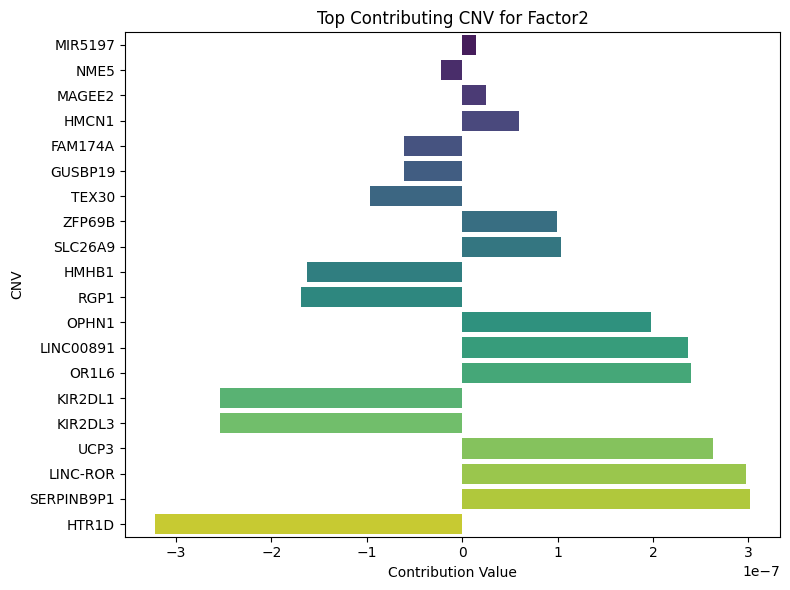

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\2106992075.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cnv, x=factor, y='Unnamed: 0', palette='viridis')


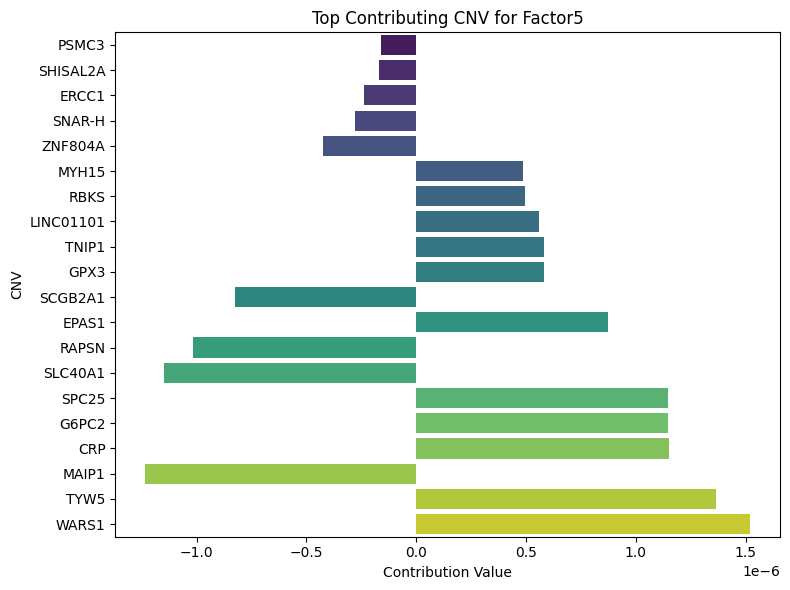

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\2106992075.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cnv, x=factor, y='Unnamed: 0', palette='viridis')


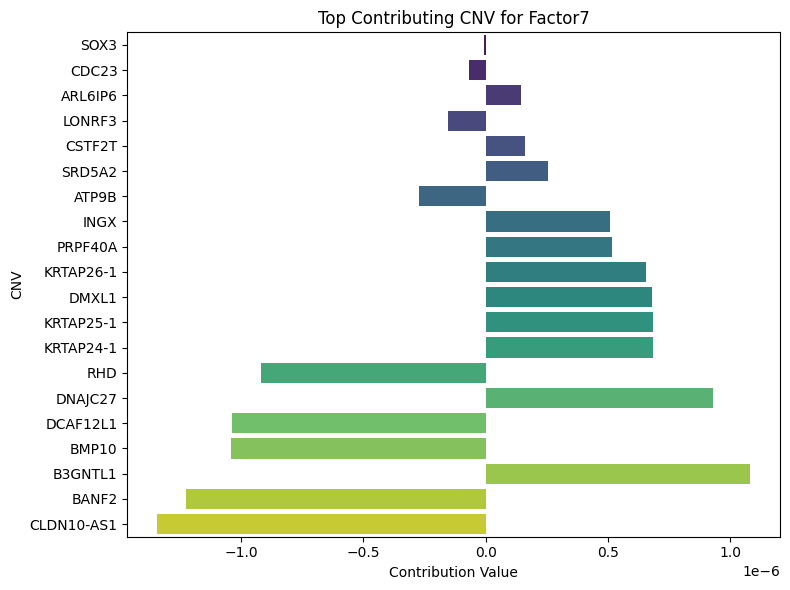

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\2106992075.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cnv, x=factor, y='Unnamed: 0', palette='viridis')


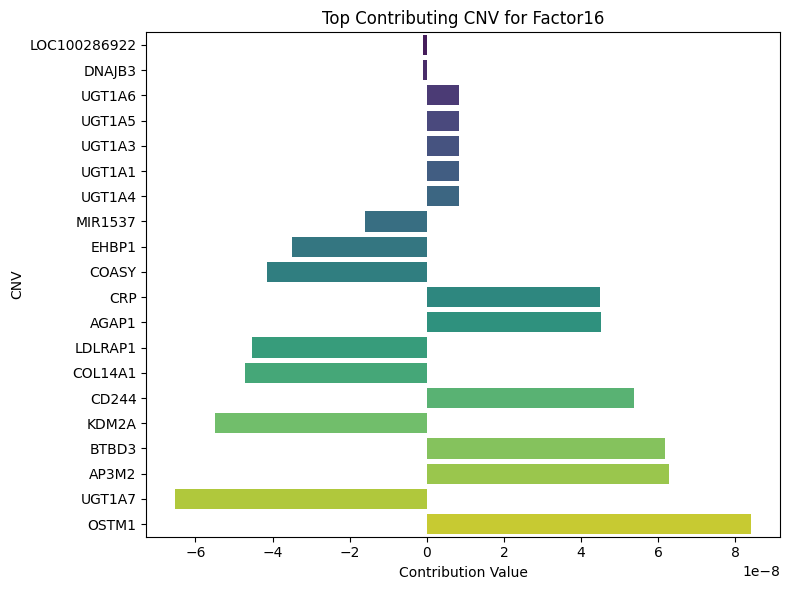

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\2106992075.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cnv, x=factor, y='Unnamed: 0', palette='viridis')


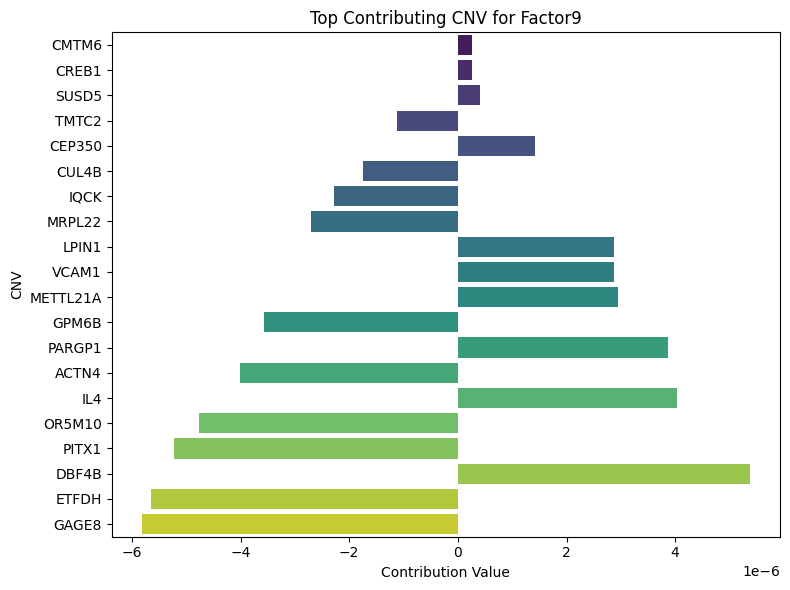

<Figure size 640x480 with 0 Axes>

In [28]:
import seaborn as sns

import matplotlib.pyplot as plt

# Define the factors of interest
factors_of_interest = ['Factor2', 'Factor5', 'Factor7', 'Factor16', 'Factor9']

# Iterate over each factor
for factor in factors_of_interest:
    # Sort the CNV by their absolute contribution to the factor
    top_cnv = CNV_loadings[['Unnamed: 0', factor]].copy()
    top_cnv['abs_value'] = top_cnv[factor].abs()
    top_cnv = top_cnv.sort_values(by='abs_value', ascending=True).head(20)
    
    # Plot the barplot
    plt.figure(figsize=(8, 6))
    sns.barplot(data=top_cnv, x=factor, y='Unnamed: 0', palette='viridis')
    plt.title(f"Top Contributing CNV for {factor}")
    plt.xlabel("Contribution Value")
    plt.ylabel("CNV")
    plt.tight_layout()
    plt.show()

    plt.savefig(f"top_contributing_CNV_{factor}.png")
    plt.show()

In [29]:
mRNA_loadings.head()    

Unnamed: 0 Gene_Symbol   Factor1   Factor2   Factor3   Factor4   Factor5  \
0           1      TSPAN6  0.093851 -0.146086  0.010773  0.000062 -0.012595   
1           2        TNMD -0.085582 -0.241096 -0.058749  0.001906  0.091270   
2           3        DPM1  0.064093  0.041769 -0.000276 -0.000272 -0.054204   
3           4       SCYL3 -0.048324  0.025773  0.000162  0.000027 -0.012661   
4           5       FIRRM  0.122978  0.065916 -0.046020  0.000247 -0.061842   

    Factor6   Factor7   Factor8  ...  Factor11  Factor12  Factor13  Factor14  \
0 -0.002914  0.025274 -0.008378  ... -0.026044 -0.033299 -0.069627  0.053756   
1  0.006400 -0.003399  0.012938  ...  0.052362 -0.006421  0.000157 -0.002450   
2 -0.025600 -0.060300  0.000103  ... -0.112352 -0.123324  0.010914  0.001105   
3 -0.099458  0.259612 -0.036437  ...  0.067138 -0.162759  0.000335  0.000864   
4 -0.135762  0.287443  0.000145  ... -0.000659 -0.260772 -0.000005  0.023953   

   Factor15  Factor16      Factor17  Factor18  Factor19  Factor20  
0  0.001902 -0.000492  9.230273e-08 -0.000003  0.000670 -0.000012  
1  0.000345 -0.024431 -4.459858e-07  0.000005  0.000076 -0.000881  
2 -0.000965  0.103730  9.746422e-09  0.000004  0.002748  0.000130  
3 -0.004349 -0.079682 -6.889582e-10  0.000007  0.000113 -0.001278  
4  0.001925 -0.126408  2.125918e-09 -0.000001  0.001005 -0.000760  

[5 rows x 22 columns]

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\1745427854.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mrna, x=factor, y='Gene_Symbol', palette='viridis')


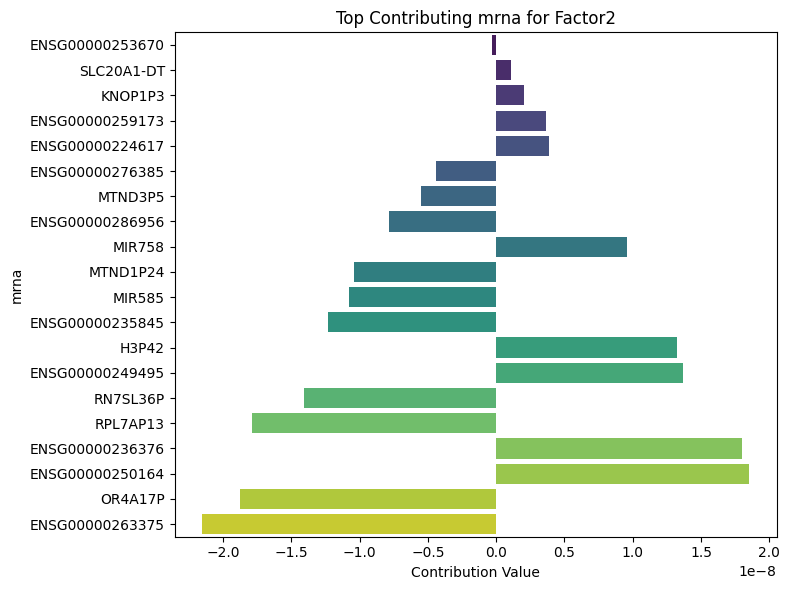

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\1745427854.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mrna, x=factor, y='Gene_Symbol', palette='viridis')


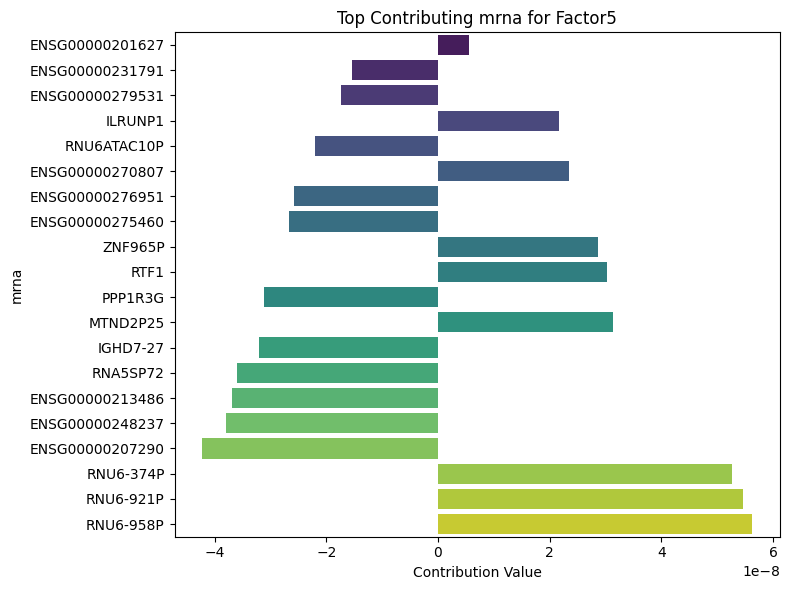

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\1745427854.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mrna, x=factor, y='Gene_Symbol', palette='viridis')


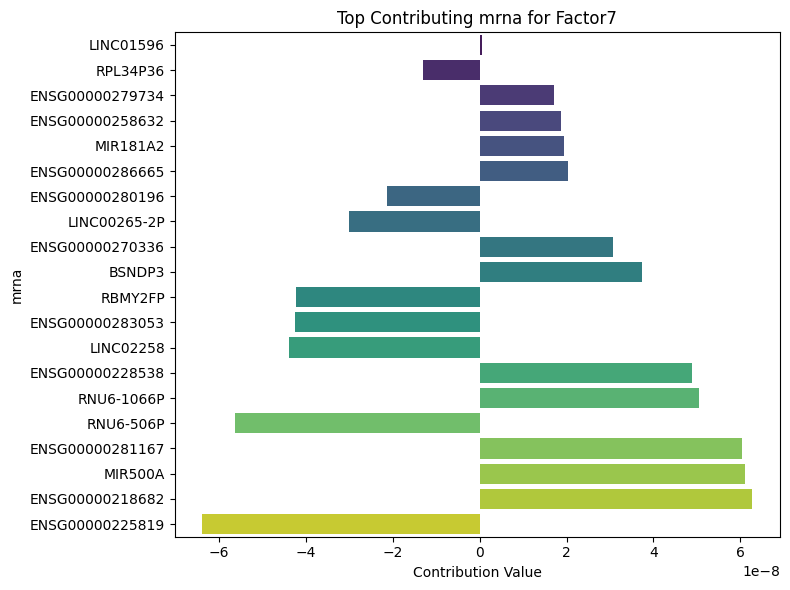

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\1745427854.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mrna, x=factor, y='Gene_Symbol', palette='viridis')


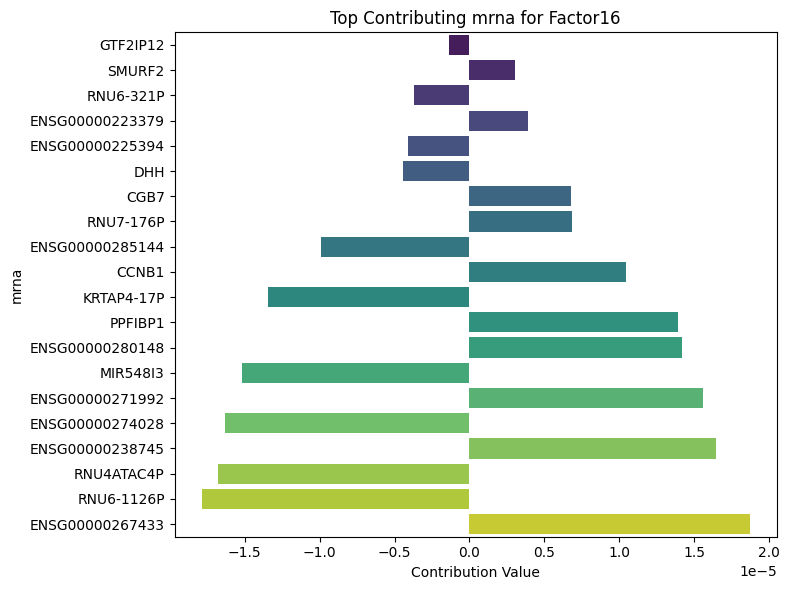

<Figure size 640x480 with 0 Axes>

C:\Users\BITS\AppData\Local\Temp\ipykernel_23096\1745427854.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_mrna, x=factor, y='Gene_Symbol', palette='viridis')


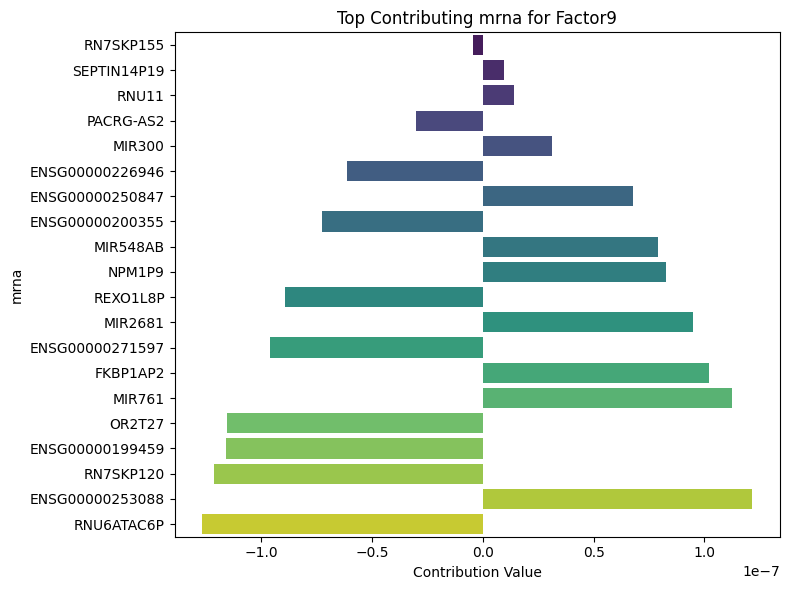

<Figure size 640x480 with 0 Axes>

In [30]:
import seaborn as sns

import matplotlib.pyplot as plt

# Define the factors of interest
factors_of_interest = ['Factor2', 'Factor5', 'Factor7', 'Factor16', 'Factor9']

# Iterate over each factor
for factor in factors_of_interest:
    # Sort the mrna by their absolute contribution to the factor
    top_mrna = mRNA_loadings[['Gene_Symbol', factor]].copy()
    top_mrna['abs_value'] = top_mrna[factor].abs()
    top_mrna = top_mrna.sort_values(by='abs_value', ascending=True).head(20)
    
    # Plot the barplot
    plt.figure(figsize=(8, 6))
    sns.barplot(data=top_mrna, x=factor, y='Gene_Symbol', palette='viridis')
    plt.title(f"Top Contributing mrna for {factor}")
    plt.xlabel("Contribution Value")
    plt.ylabel("mrna")
    plt.tight_layout()
    plt.show()

    plt.savefig(f"top_contributing_mrna_{factor}.png")
    plt.show()

In [31]:
print(latent_factors.head())

        Unnamed: 0   Factor1   Factor2   Factor3   Factor4   Factor5  \
0  TCGA-3C-AALI-01  0.639902  0.892471 -0.410834 -0.913015 -3.555564   
1  TCGA-3C-AALK-01 -1.520547 -1.149389  0.427363  2.090040 -0.112681   
2  TCGA-4H-AAAK-01 -1.504596 -1.953555  1.890563 -1.399030 -1.060023   
3  TCGA-5L-AAT1-01 -1.665115 -1.034575 -2.492642  0.202116  0.290123   
4  TCGA-5T-A9QA-01 -0.489632  2.771917  1.532430  5.981275  0.892094   

    Factor6   Factor7   Factor8   Factor9  ...  Factor11  Factor12  Factor13  \
0  2.330874 -0.473768  0.679849 -0.025081  ...  1.081197 -0.623573  4.013067   
1  1.488944  0.677706  0.363164  0.326483  ...  0.443409  0.586862  0.849359   
2  0.805667 -0.634161  0.119660  0.689531  ... -0.472393  0.740484 -2.122864   
3  2.388590  0.171250 -0.459557 -0.097197  ...  0.331531  0.500514 -0.989911   
4  3.101825  0.072496  4.082042 -0.529657  ... -0.181365 -1.791988  2.203700   

   Factor14  Factor15  Factor16  Factor17  Factor18  Factor19  Factor20  
0 -0.591733 

In [32]:
mRNA_loadings.set_index('Gene_Symbol', inplace=True)
miRNA_loadings.set_index('Unnamed: 0', inplace=True)
methylation_loadings.set_index('Unnamed: 0', inplace=True)
CNV_loadings.set_index('Unnamed: 0', inplace=True)
protein_loadings.set_index('Unnamed: 0', inplace=True)

In [34]:
top_latent_factors= ['Factor2', 'Factor5', 'Factor7', 'Factor16', 'Factor9']
def get_top_features(weights_df, latent_factors, top_n=100):
    top_features = {}
    for factor in latent_factors:
        factor_weights = weights_df[factor]  
        top_features[factor] = factor_weights.abs().nlargest(top_n).index.tolist()
    return top_features

In [35]:
top_mrna_genes = get_top_features(mRNA_loadings, top_latent_factors)
top_mirna= get_top_features(miRNA_loadings, top_latent_factors)
top_cnv = get_top_features(CNV_loadings, top_latent_factors)   
top_protiens = get_top_features(protein_loadings, top_latent_factors)
top_methyl = get_top_features(methylation_loadings, top_latent_factors)

# Convert top_mrna_genes dictionary to DataFrame
top_mrna_genes_df = pd.DataFrame.from_dict(top_mrna_genes, orient='index').transpose()
print("Top mRNA Genes DataFrame:")
print(top_mrna_genes_df.head())

# Convert top_mirna dictionary to DataFrame
top_mirna_df = pd.DataFrame.from_dict(top_mirna, orient='index').transpose()
print("\nTop miRNA DataFrame:")
print(top_mirna_df.head())

# Convert top_cnv dictionary to DataFrame
top_cnv_df = pd.DataFrame.from_dict(top_cnv, orient='index').transpose()
print("\nTop CNV DataFrame:")
print(top_cnv_df.head())

# Convert top_methyl dictionary to DataFrame
top_methyl_df = pd.DataFrame.from_dict(top_methyl, orient='index').transpose()
print("\nTop Methylation DataFrame:")
print(top_methyl_df.head())

# Convert top_proteins dictionary to DataFrame
top_proteins_df = pd.DataFrame.from_dict(top_protiens, orient='index').transpose()
print("\nTop Proteins DataFrame:")
print(top_proteins_df.head())

# Write top_mrna_genes_df to CSV
top_mrna_genes_df.to_csv("top_mrna_genes.csv", index=False)

# Write top_mirna_df to CSV
top_mirna_df.to_csv("top_mirna.csv", index=False)

# Write top_cnv_df to CSV
top_cnv_df.to_csv("top_cnv.csv", index=False)

# Write top_methyl_df to CSV
top_methyl_df.to_csv("top_methyl.csv", index=False)

# Write top_proteins_df to CSV
top_proteins_df.to_csv("top_proteins_.csv", index=False)

Top mRNA Genes DataFrame:
   Factor2 Factor5 Factor7  Factor16 Factor9
0  COL17A1   NTRK2    MUC1    RNU4-2   SOX10
1    KRT14  HOXC11  TRIM36    RNU4-1    MMP1
2      OGN  HS6ST3  ZBTB18  SNORA73B    SPP1
3    KRT17  HOXC13    NAT1  SNORA74A   MMP13
4     KRT5   FGF10   IGSF9   SCARNA5   ECRG4

Top miRNA DataFrame:
             Factor2          Factor5          Factor7         Factor16  \
0     hsa-miR-99a-5p  hsa-miR-196a-5p   hsa-miR-92b-3p   hsa-miR-23a-3p   
1      hsa-let-7c-5p     hsa-miR-4501      hsa-miR-184  hsa-miR-106b-5p   
2     hsa-miR-369-5p   hsa-miR-149-5p   hsa-miR-92b-5p   hsa-miR-766-3p   
3  hsa-miR-125b-2-3p   hsa-miR-615-3p  hsa-miR-190b-5p   hsa-miR-197-3p   
4     hsa-miR-379-5p  hsa-miR-3677-3p   hsa-miR-205-5p   hsa-miR-214-3p   

          Factor9  
0  hsa-miR-210-3p  
1  hsa-miR-204-5p  
2  hsa-miR-150-5p  
3    hsa-miR-5683  
4  hsa-miR-205-5p  

Top CNV DataFrame:
   Factor2 Factor5    Factor7  Factor16    Factor9
0   POLR3H   KRT17  LINC00210      IER5 

In [36]:
import seaborn as sns

import matplotlib.pyplot as plt

def plot_heatmaps(weights_df, top_features, omics_name):
    for factor, genes in top_features.items():
        # Select the top 20 genes for the current factor
        top_genes = genes[:20]
        heatmap_data = weights_df.loc[top_genes, [factor]]
        
        # Plot heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar=True)
        plt.title(f"Heatmap for Top 20 {omics_name} Genes in {factor}")
        plt.xlabel("Factors")
        plt.ylabel("Genes")
        plt.show()


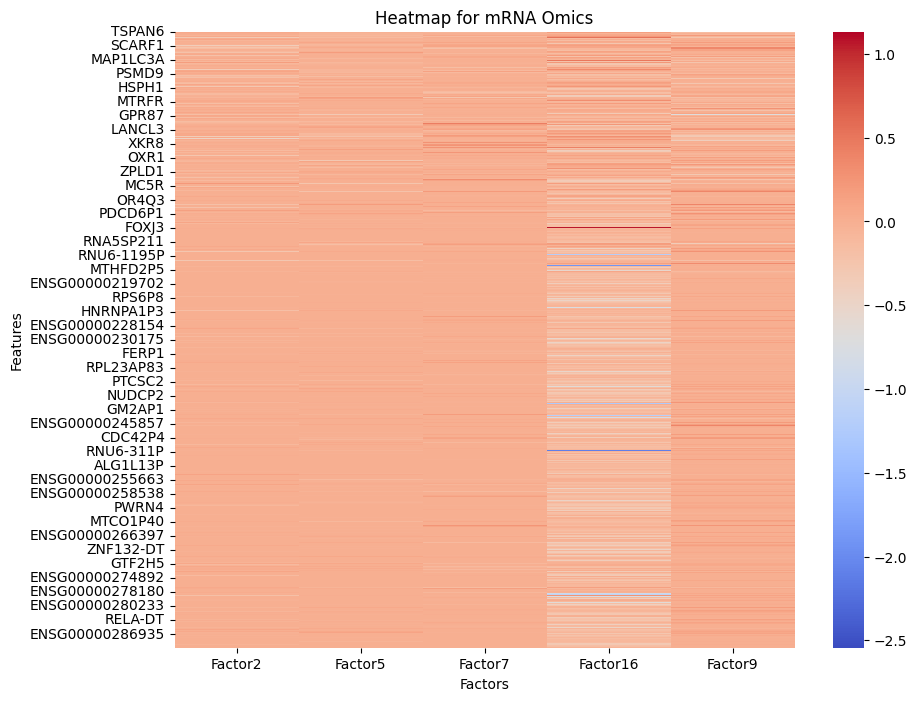

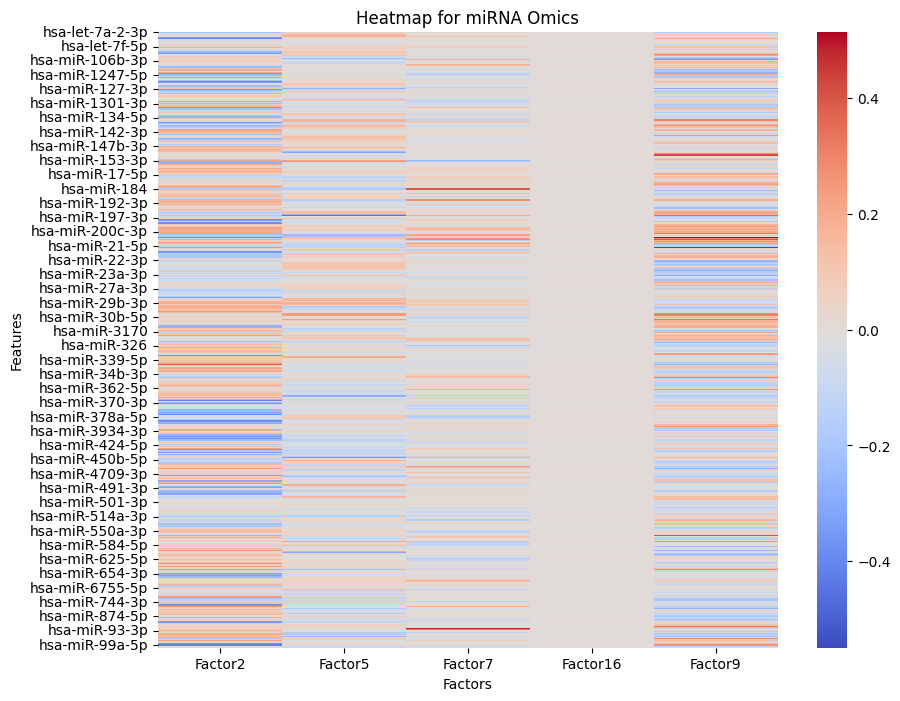

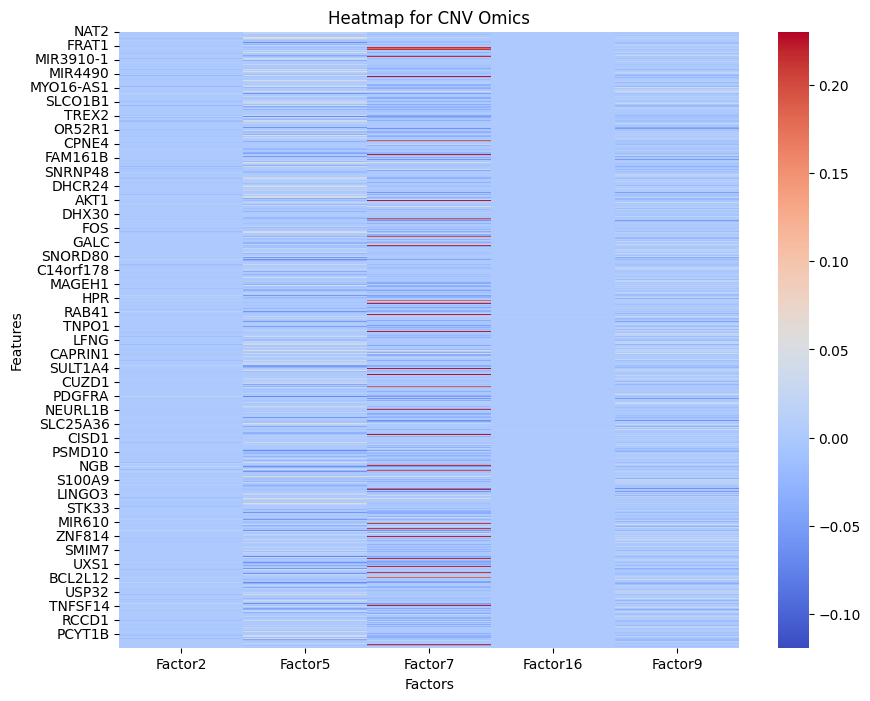

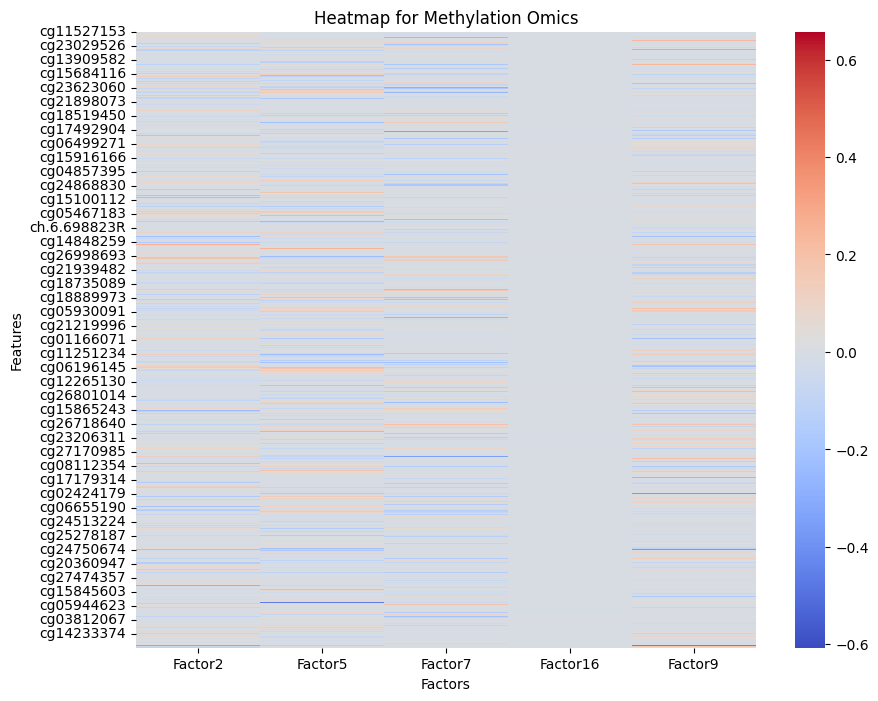

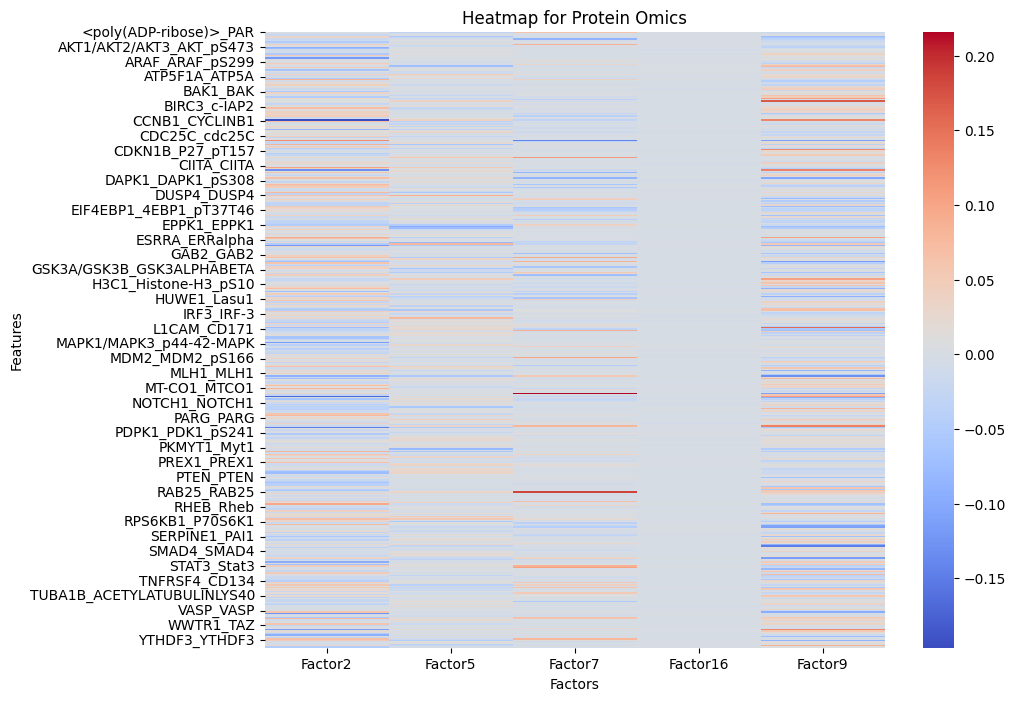

In [38]:
import seaborn as sns

import matplotlib.pyplot as plt

# Define the factors to include in the heatmaps
factors_to_plot = ['Factor2', 'Factor5', 'Factor7', 'Factor16', 'Factor9']

# Define the omics layers and their corresponding dataframes
omics_layers = {
    'mRNA': mRNA_loadings,
    'miRNA': miRNA_loadings,
    'CNV': CNV_loadings,
    'Methylation': methylation_loadings,
    'Protein': protein_loadings
}

# Generate heatmaps for each omics layer
for omics_name, weights_df in omics_layers.items():
    # Filter the dataframe to include only the specified factors
    heatmap_data = weights_df[factors_to_plot]
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar=True)
    plt.title(f"Heatmap for {omics_name} Omics")
    plt.xlabel("Factors")
    plt.ylabel("Features")
    plt.show()

In [ ]:
pip install plotly nbformat

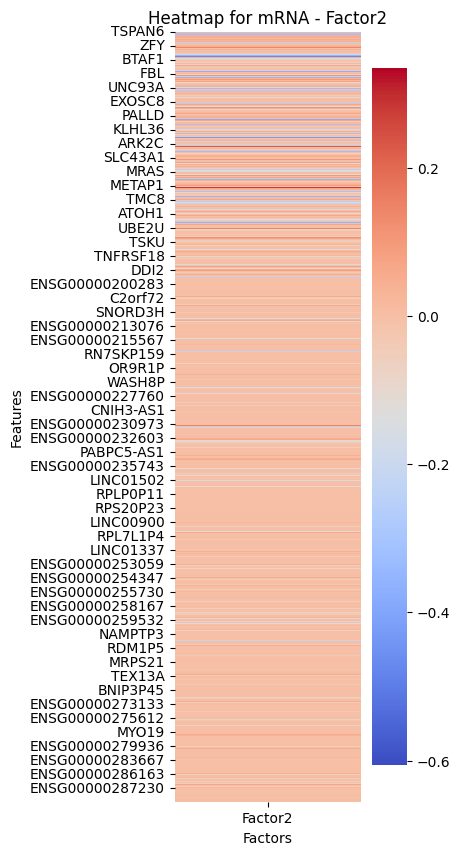

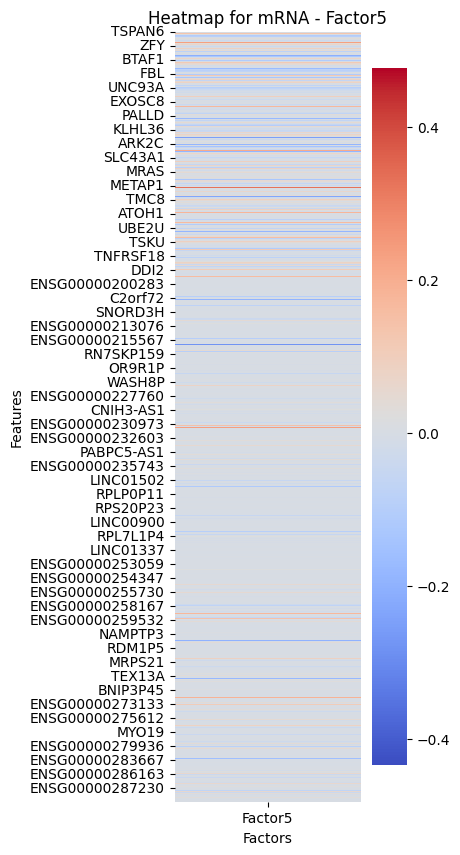

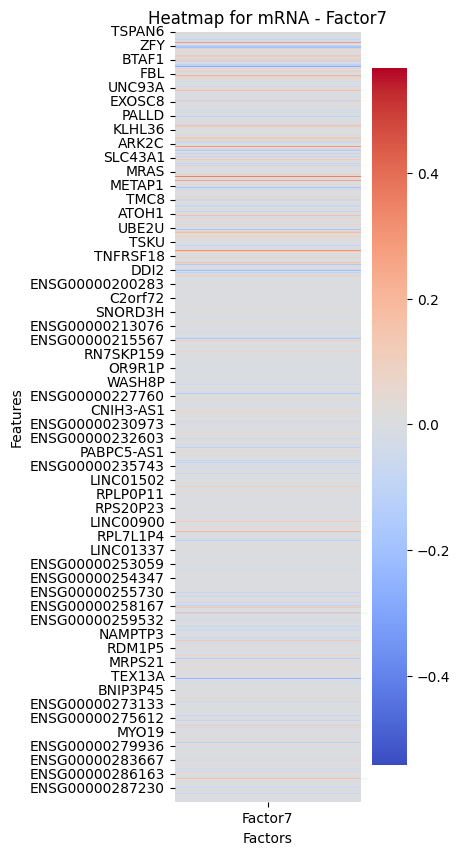

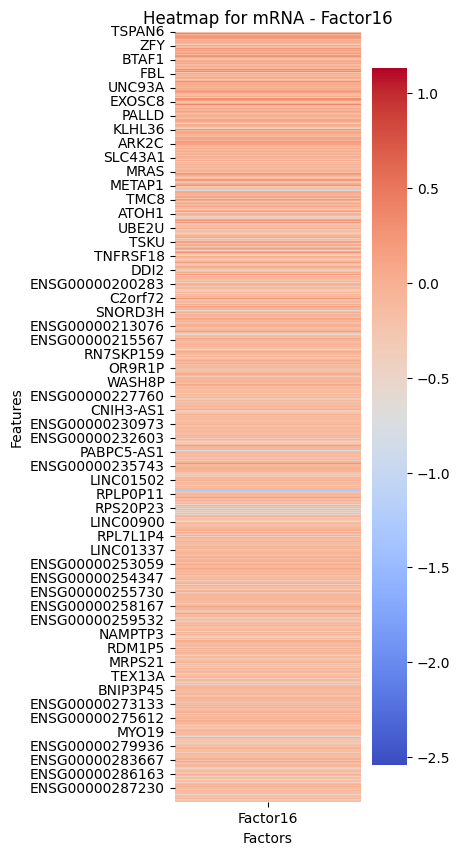

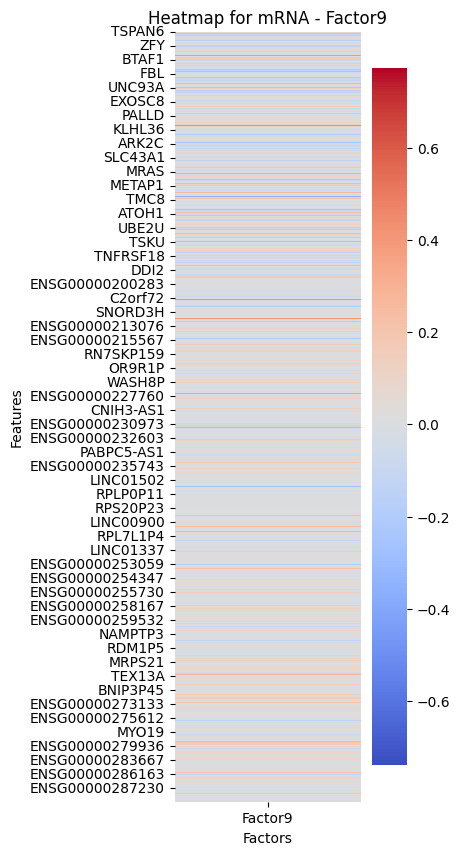

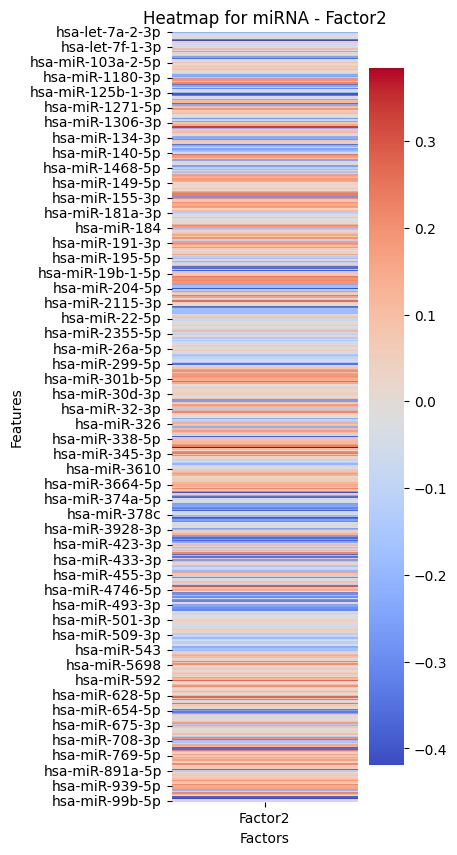

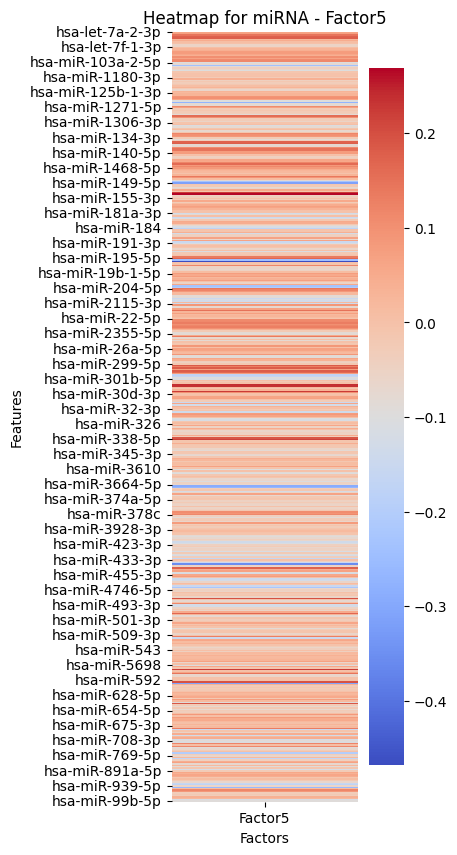

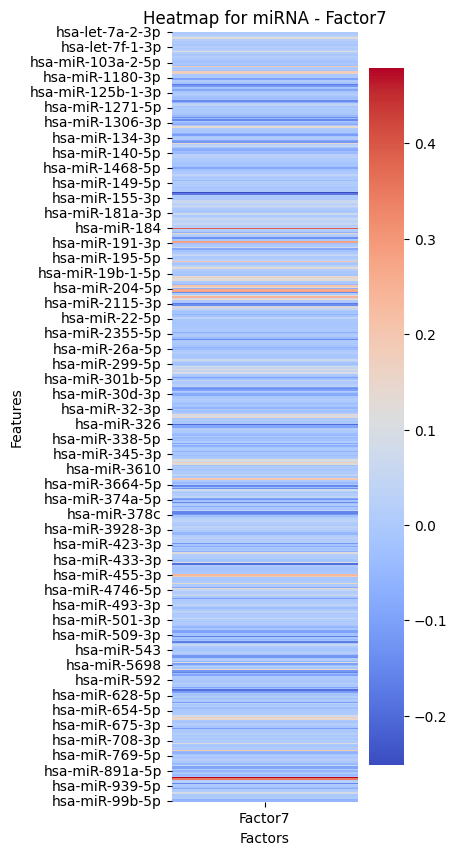

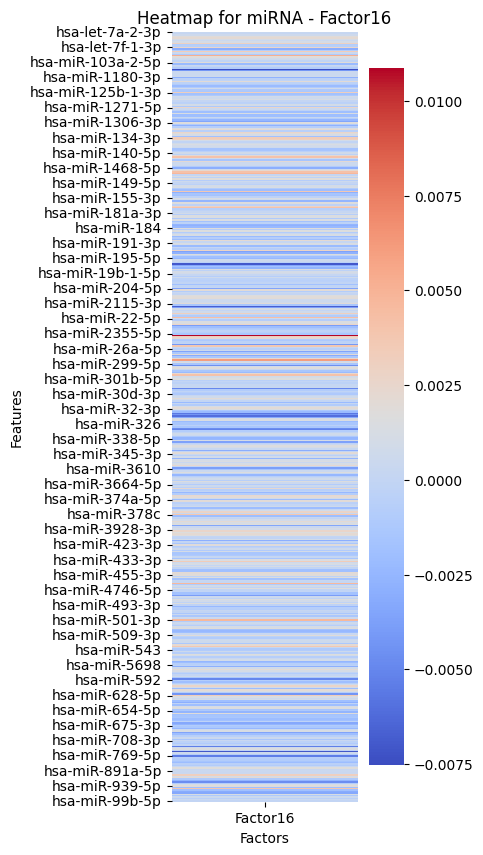

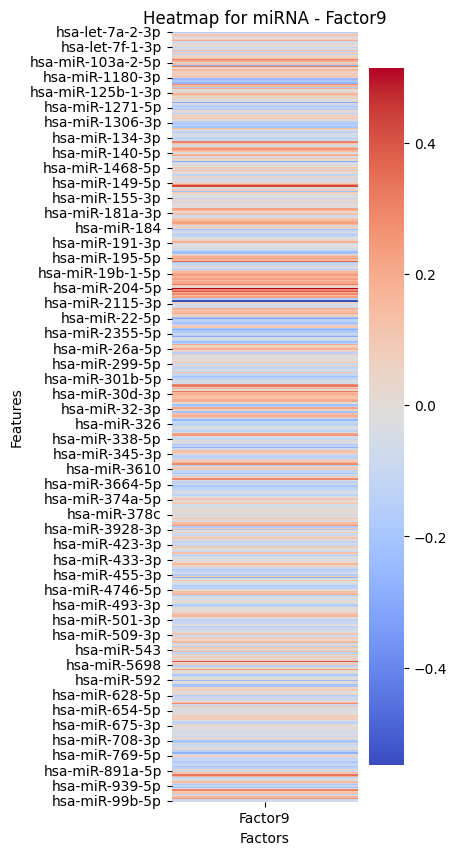

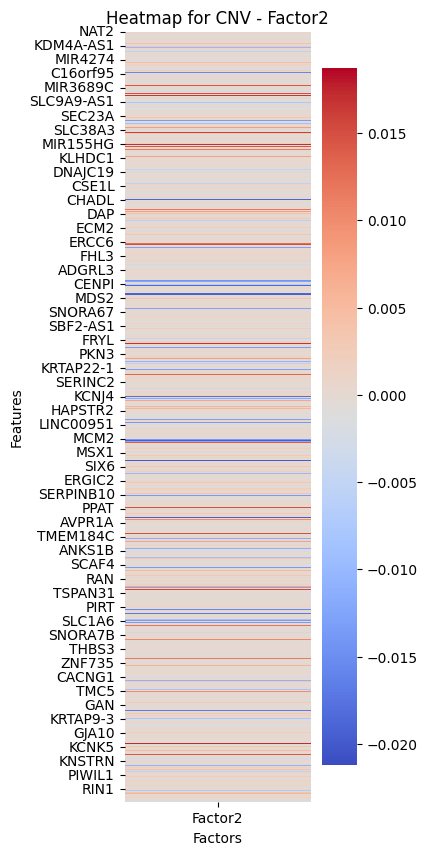

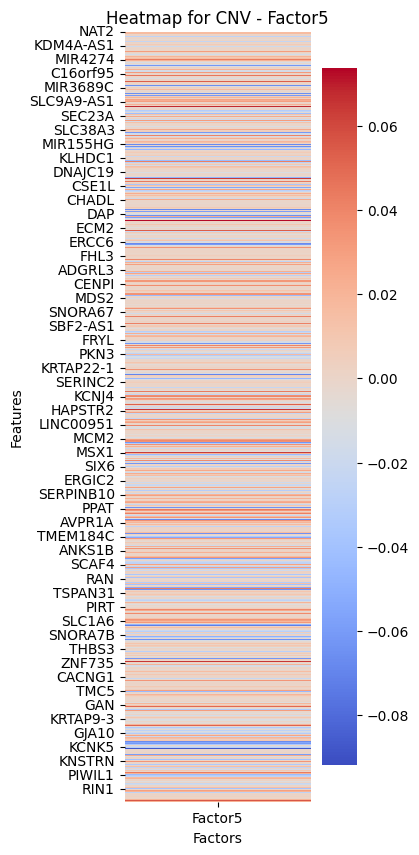

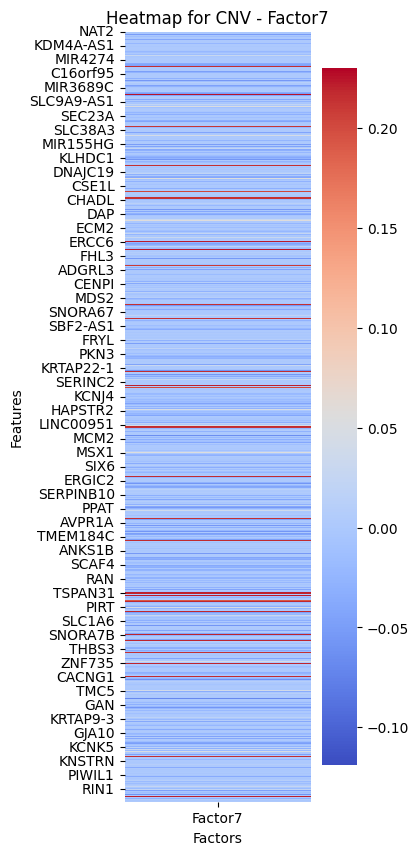

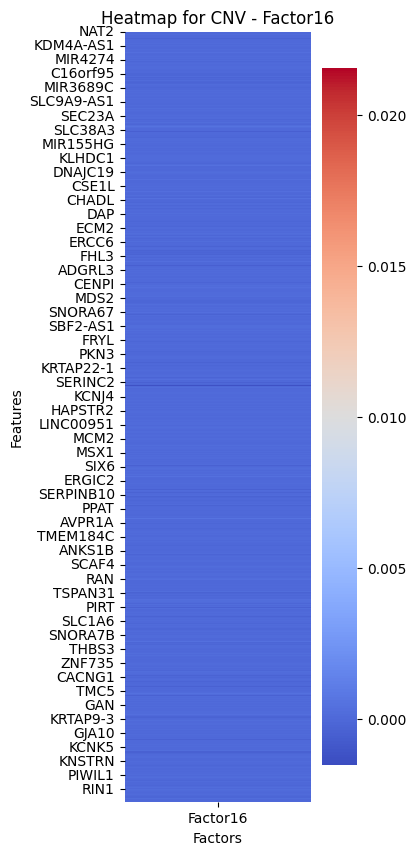

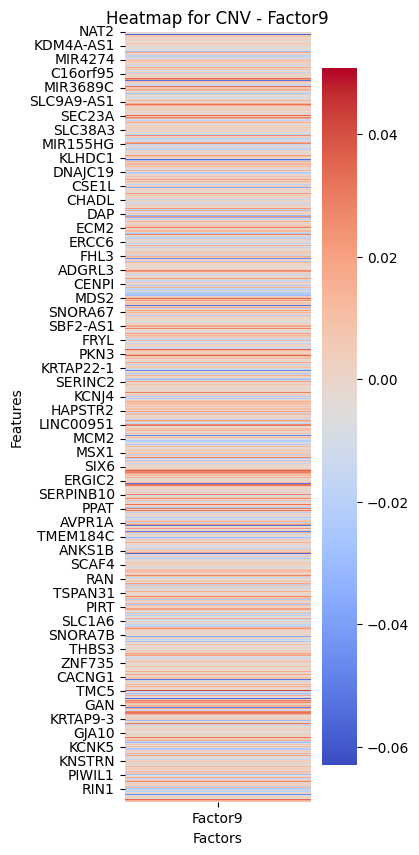

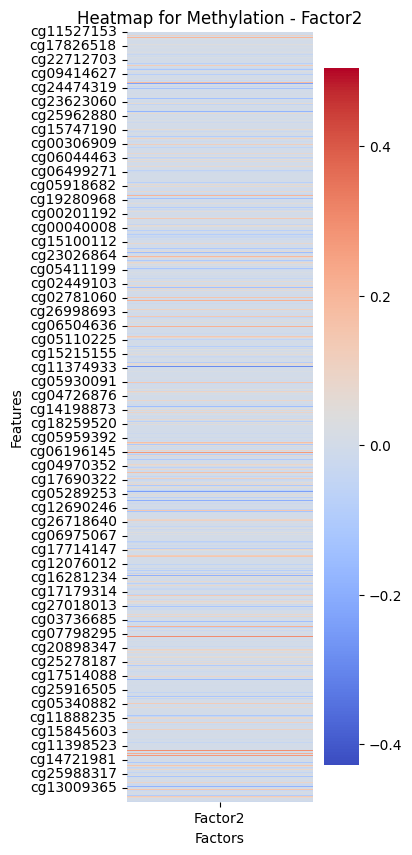

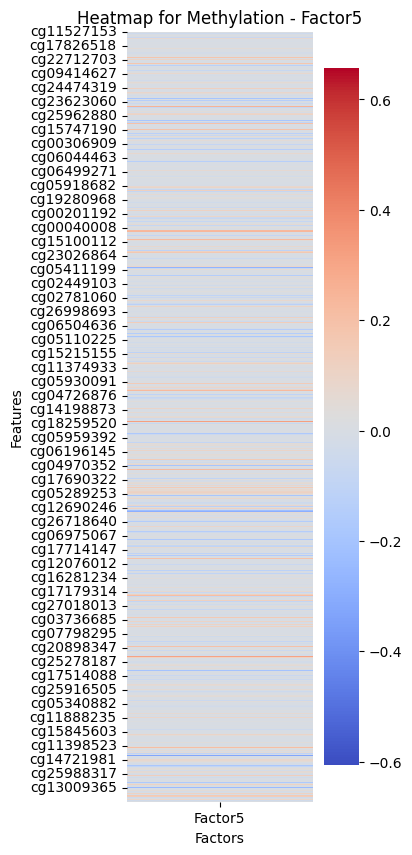

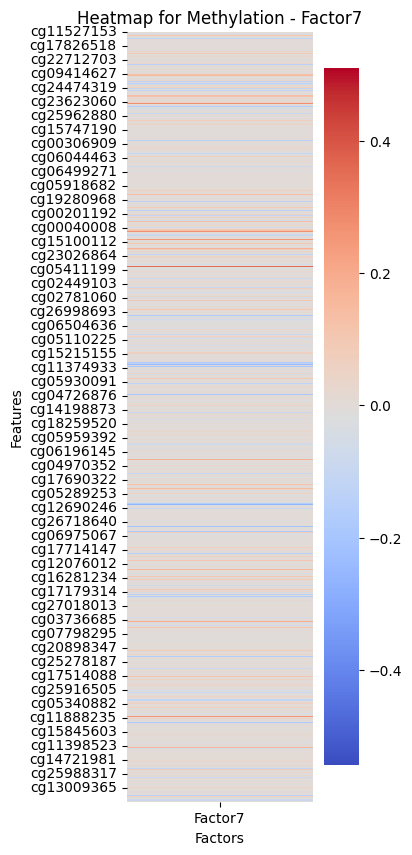

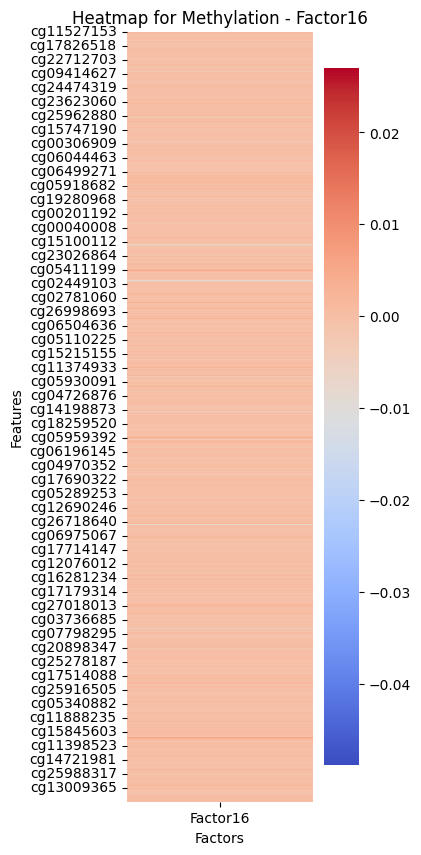

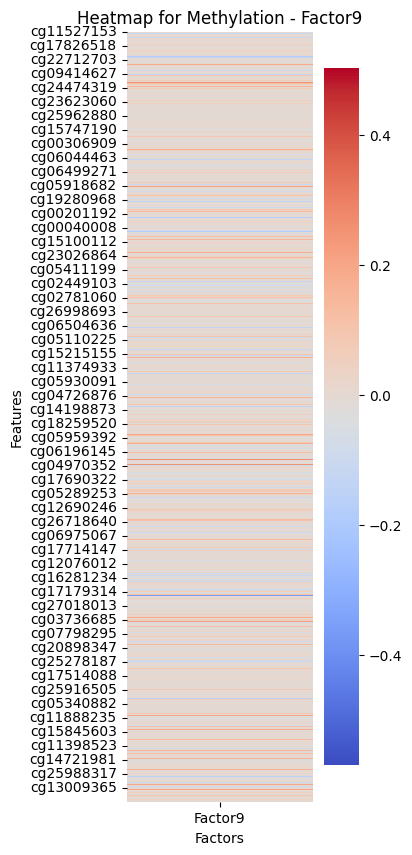

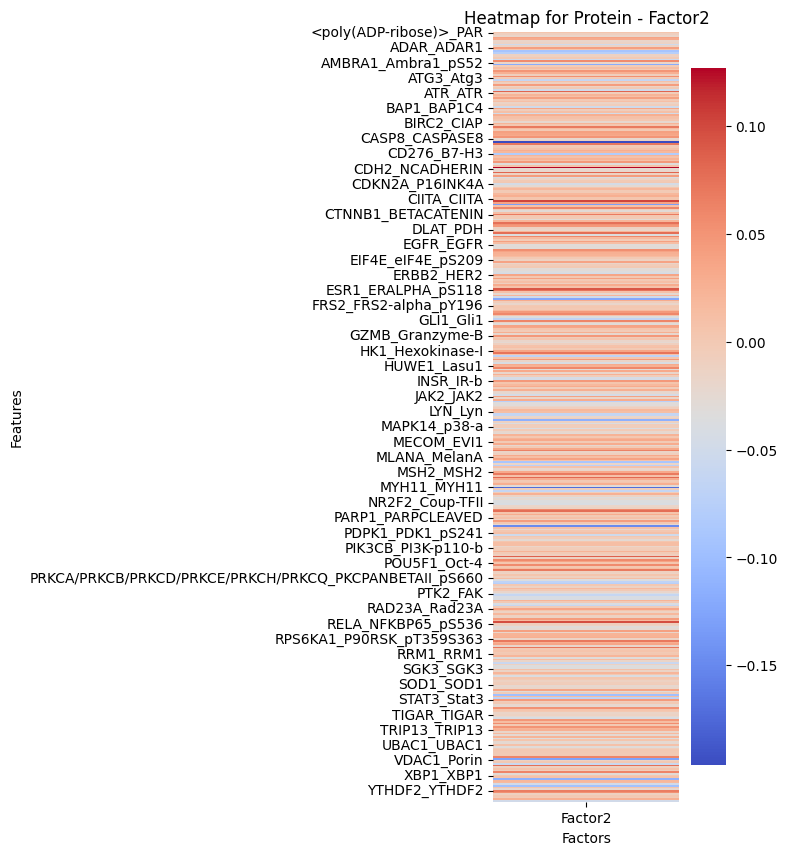

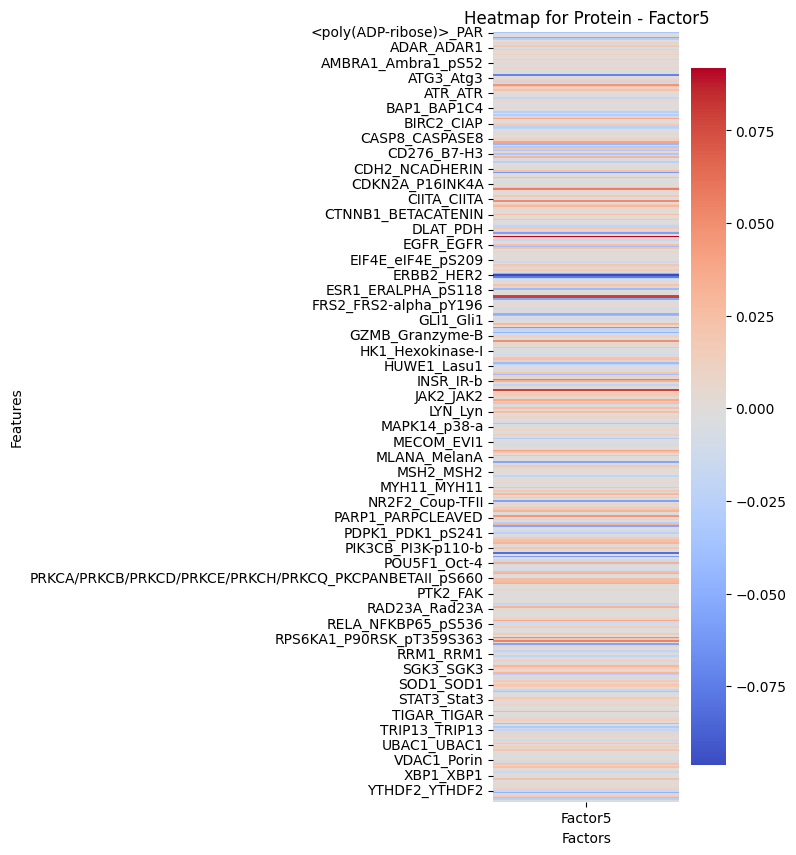

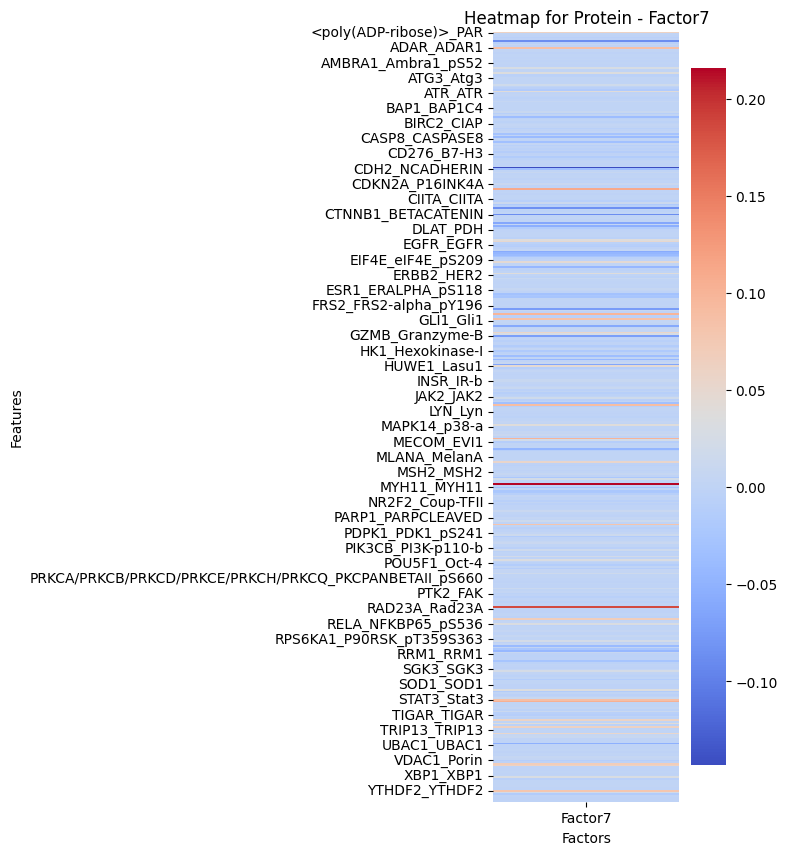

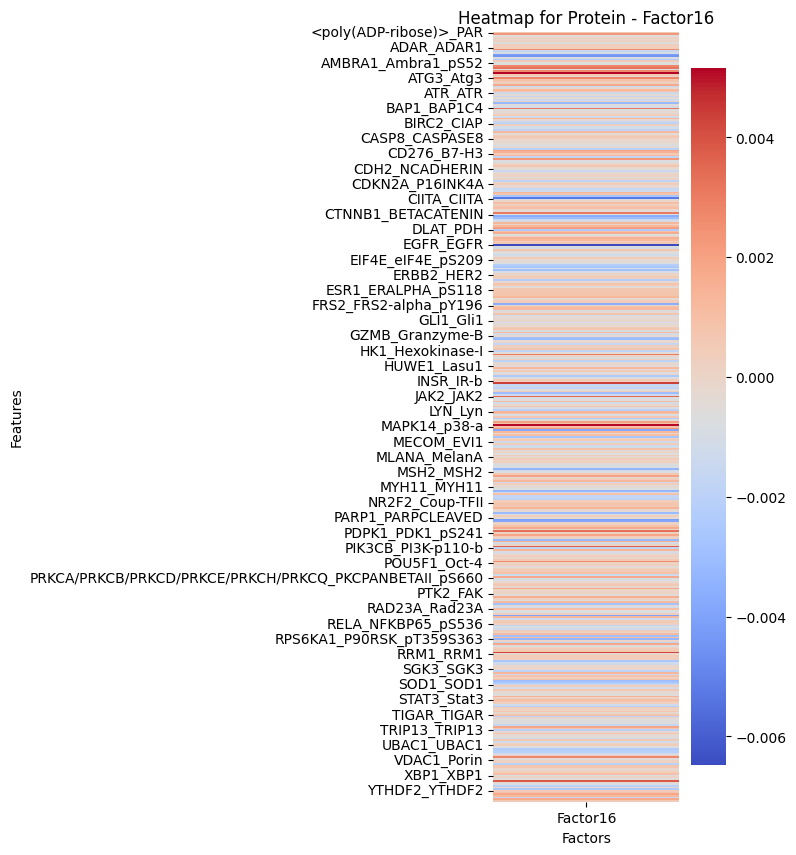

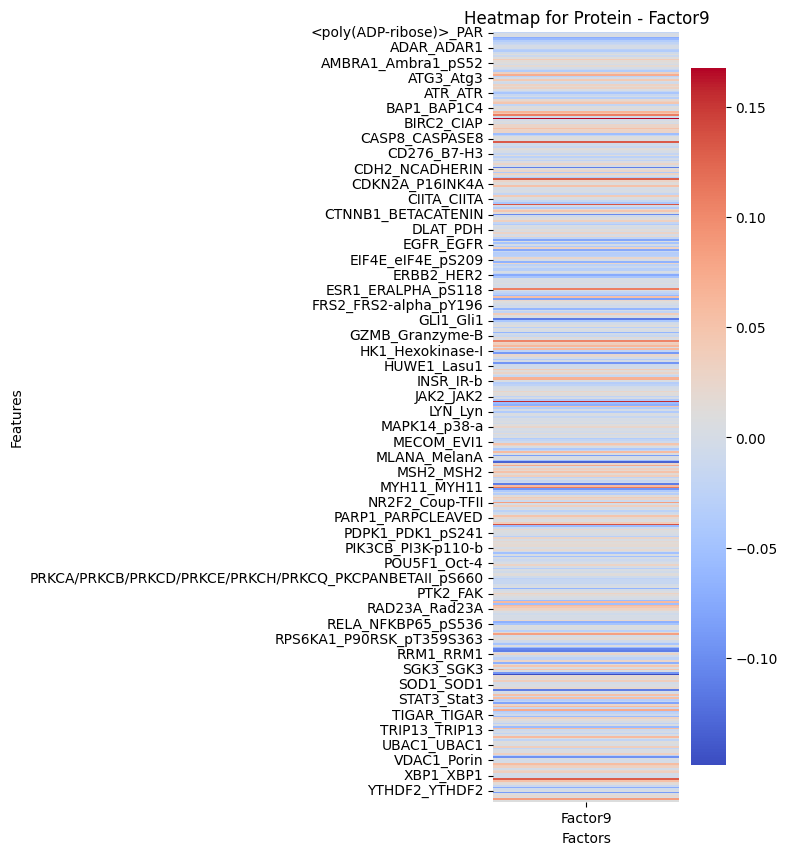

In [39]:
import seaborn as sns
latent_factors_names = ['Factor2', 'Factor5', 'Factor7', 'Factor16', 'Factor9']
import matplotlib.pyplot as plt

# Iterate over each omics type and its corresponding weights dataframe
for omics_name, weights_df in omics_layers.items():
    # Iterate over each factor
    for factor in latent_factors_names:
        # Extract the data for the current factor
        heatmap_data = weights_df[[factor]]
        
        # Plot the heatmap
        plt.figure(figsize=(3, 10))
        sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar=True)
        plt.title(f"Heatmap for {omics_name} - {factor}")
        plt.xlabel("Factors")
        plt.ylabel("Features")
        plt.show()

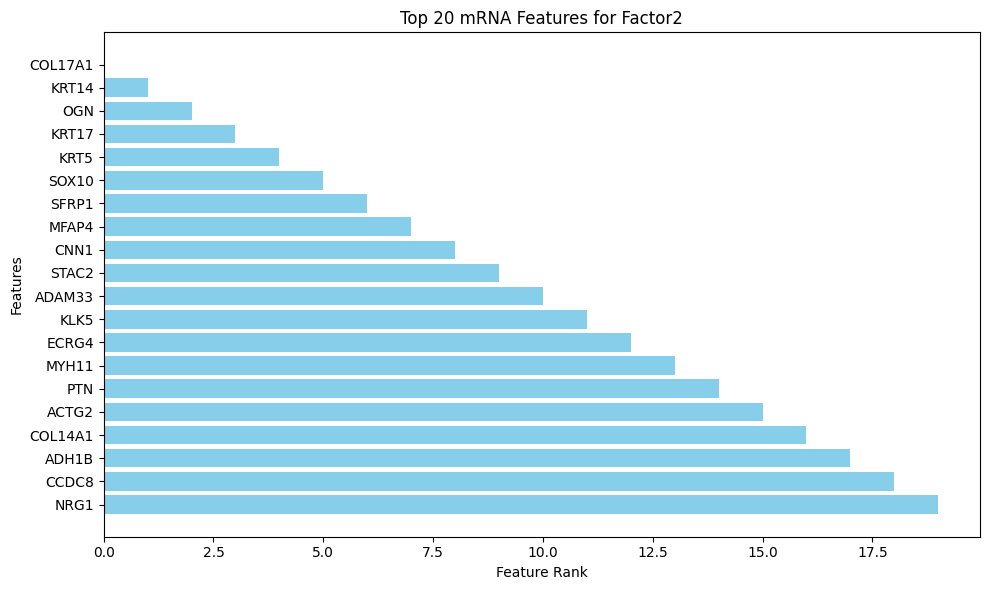

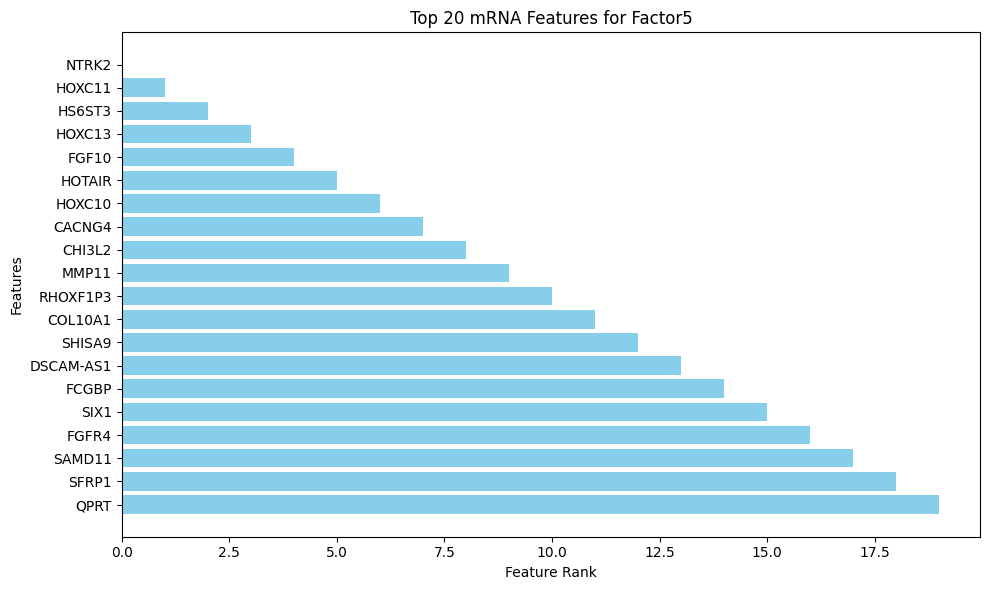

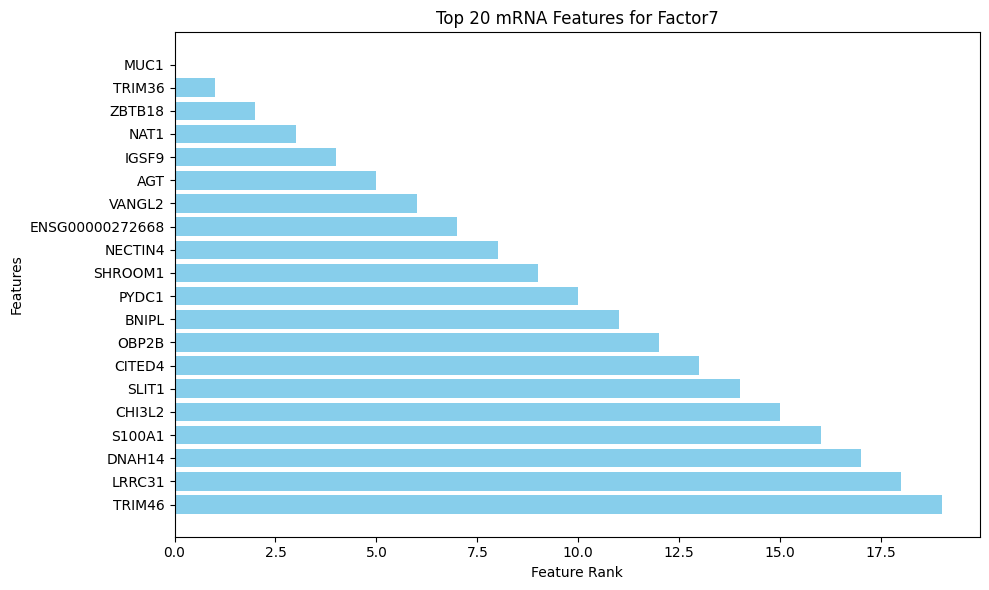

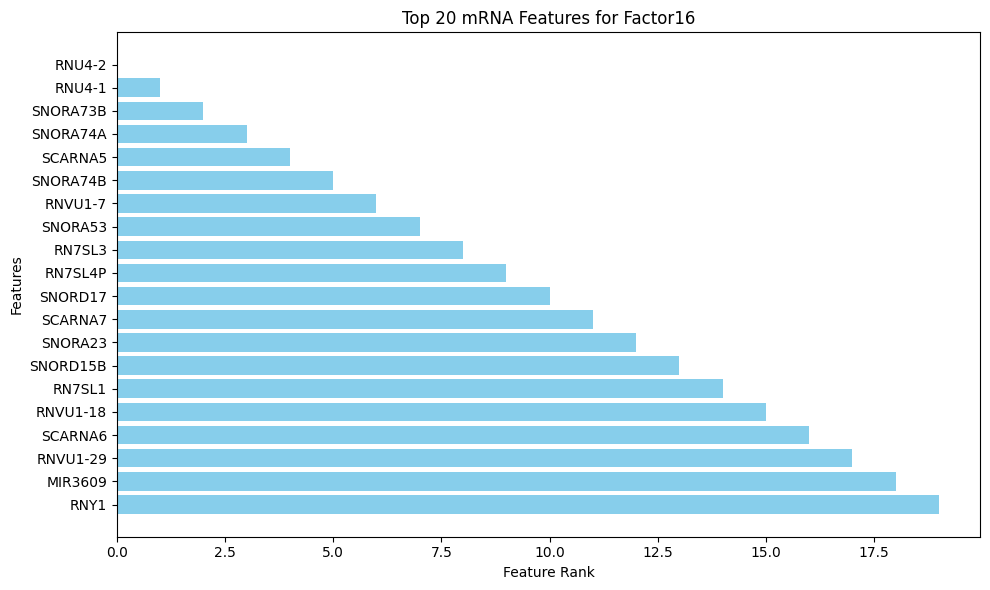

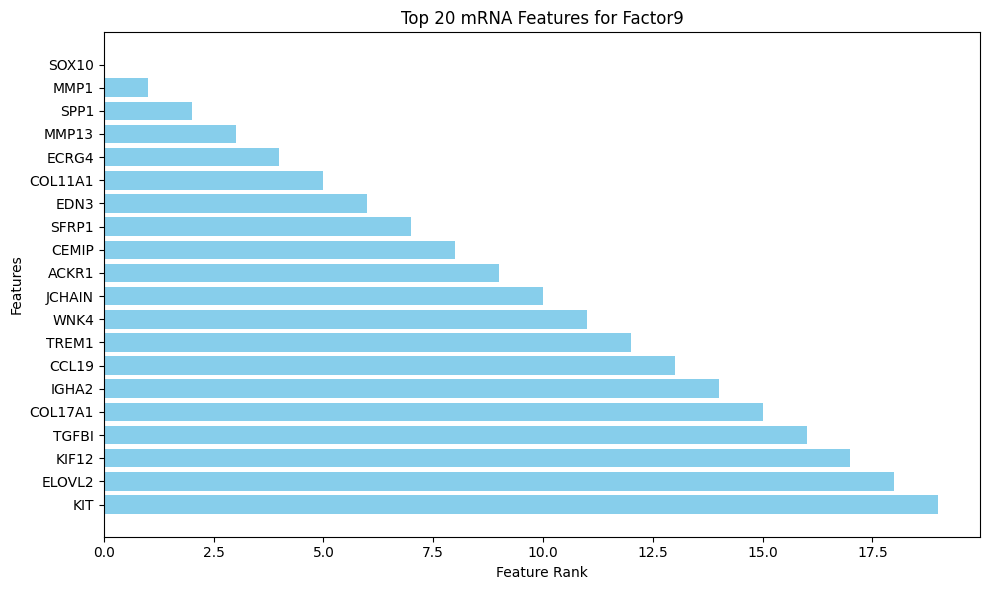

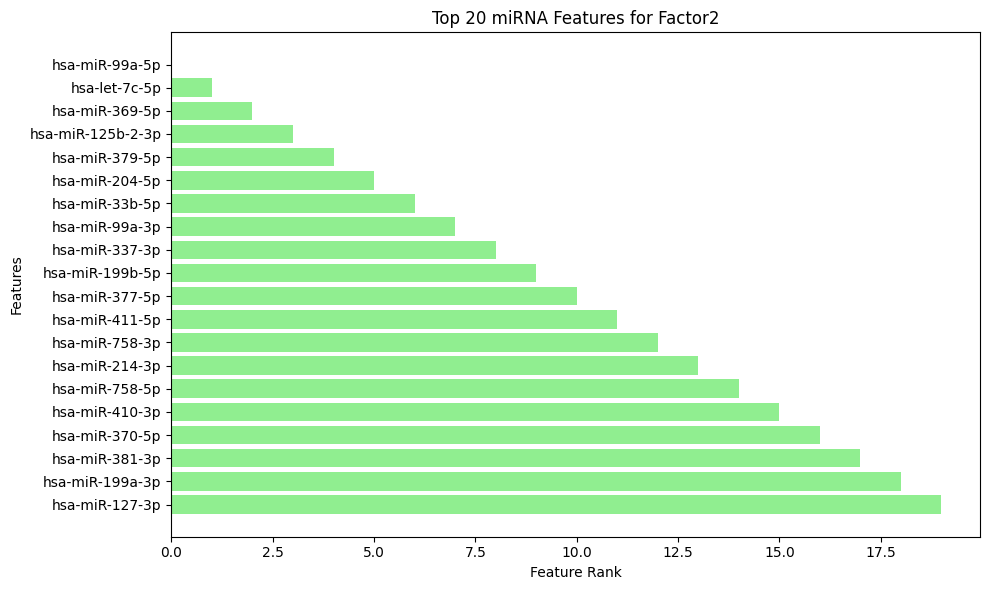

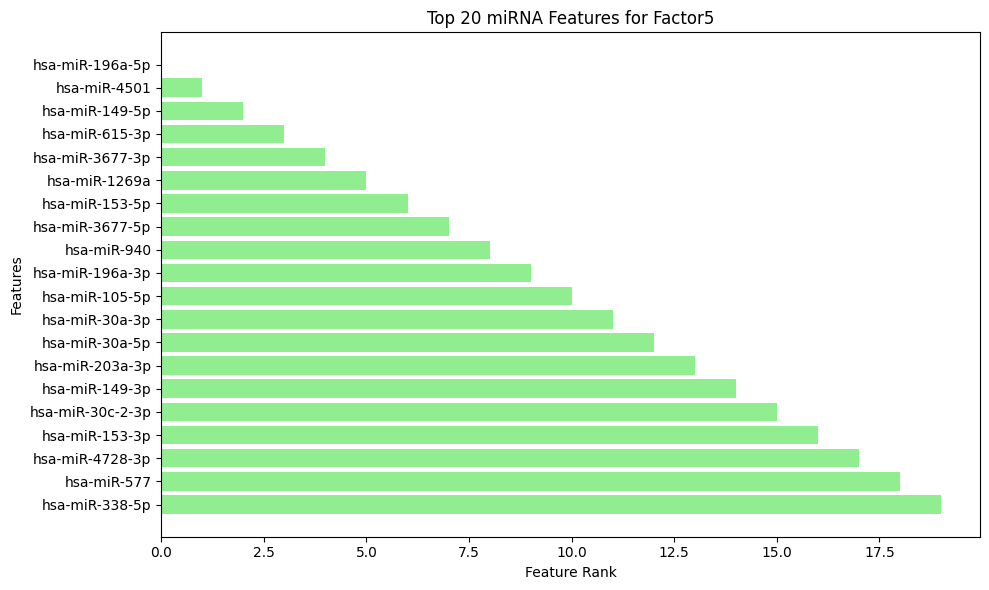

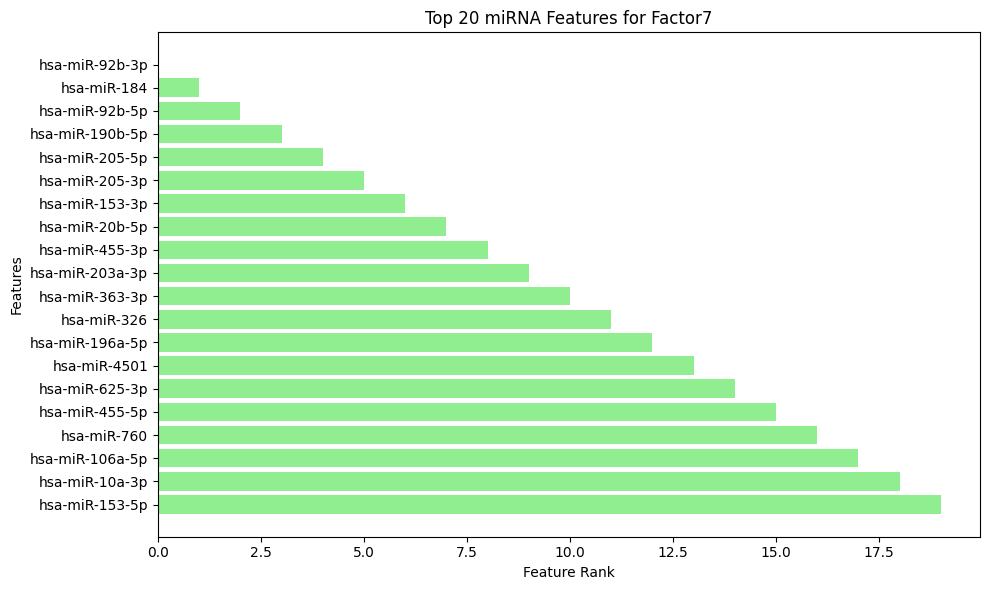

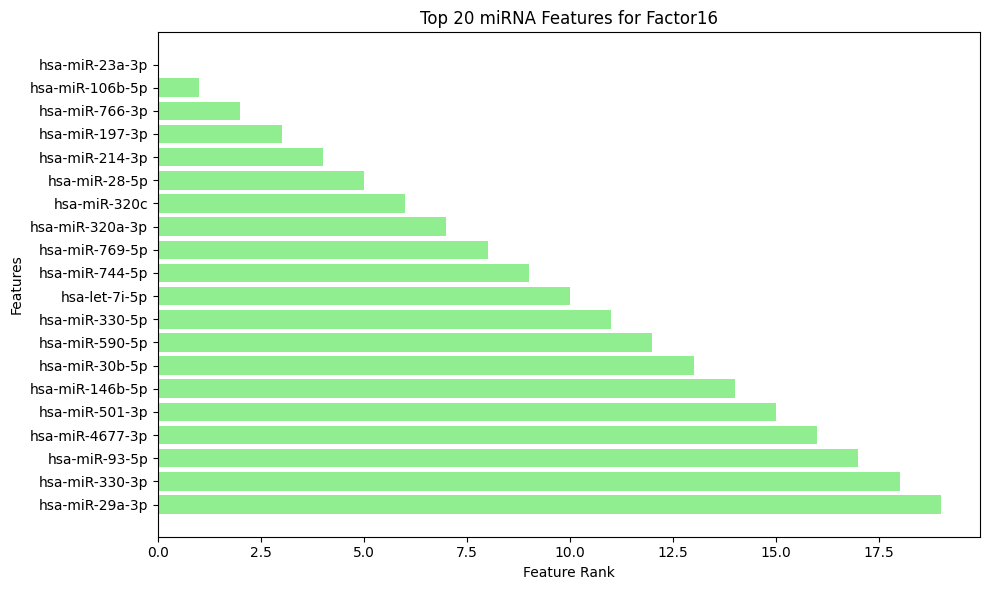

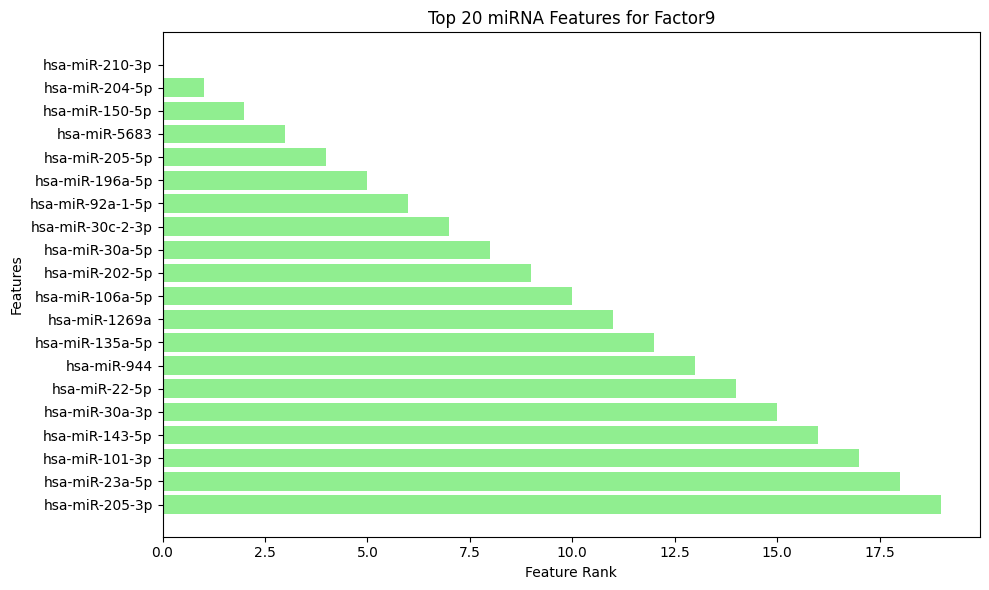

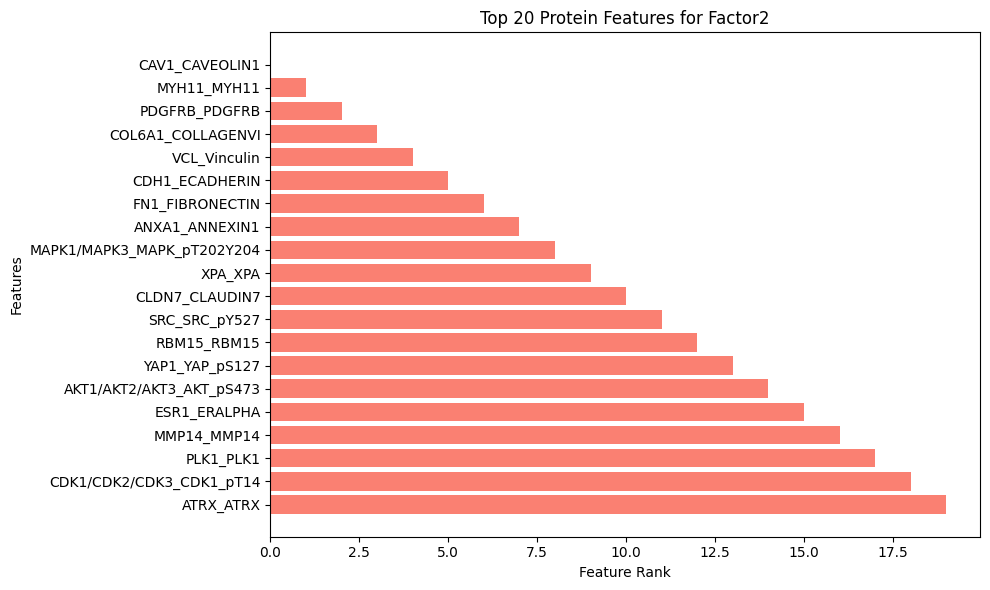

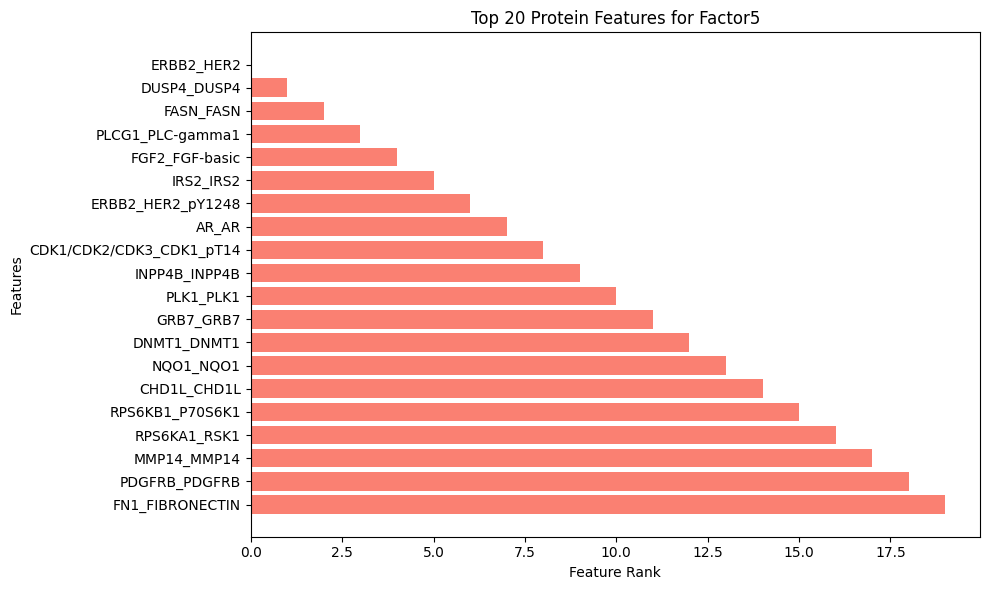

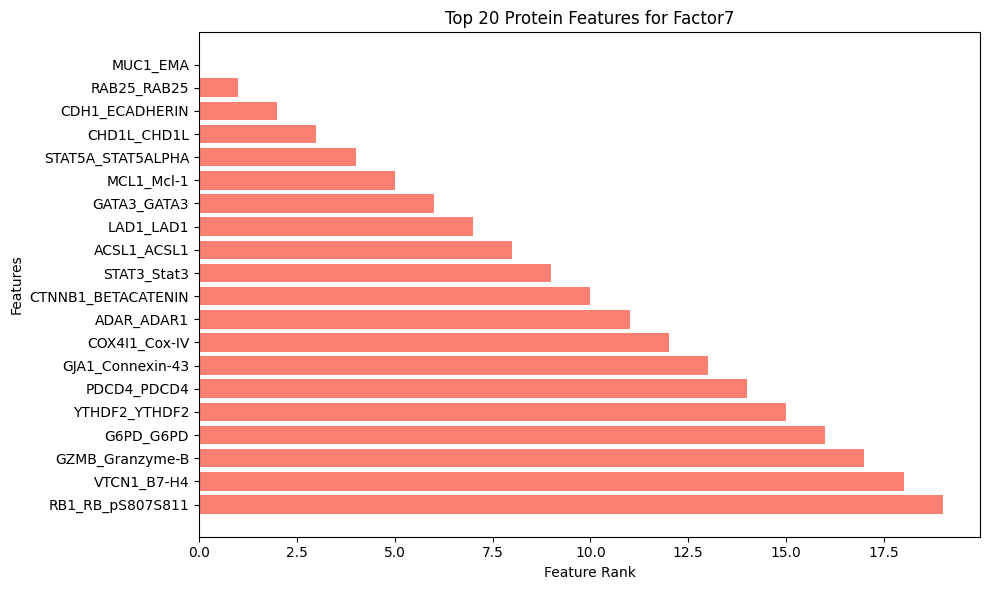

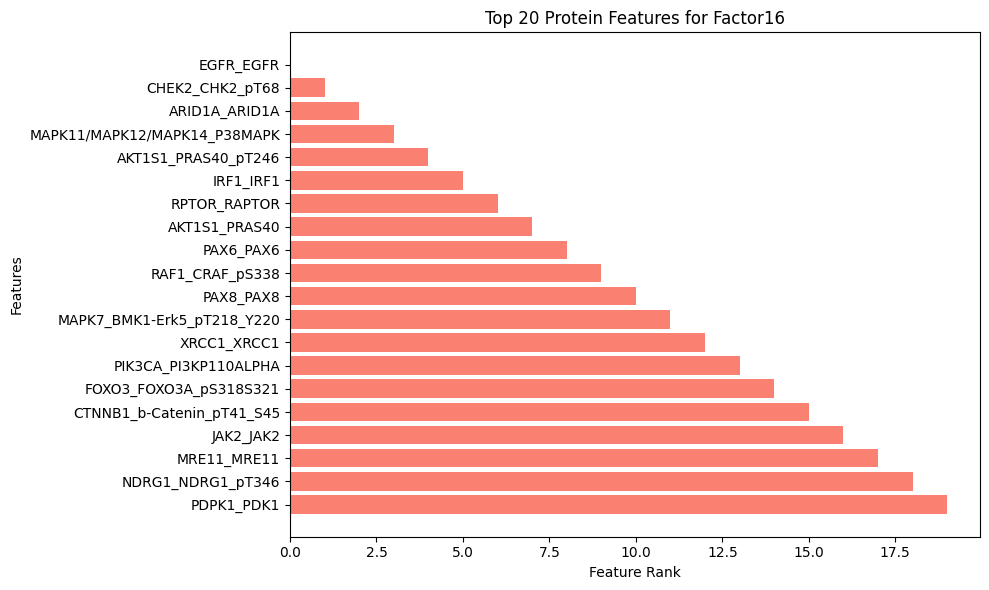

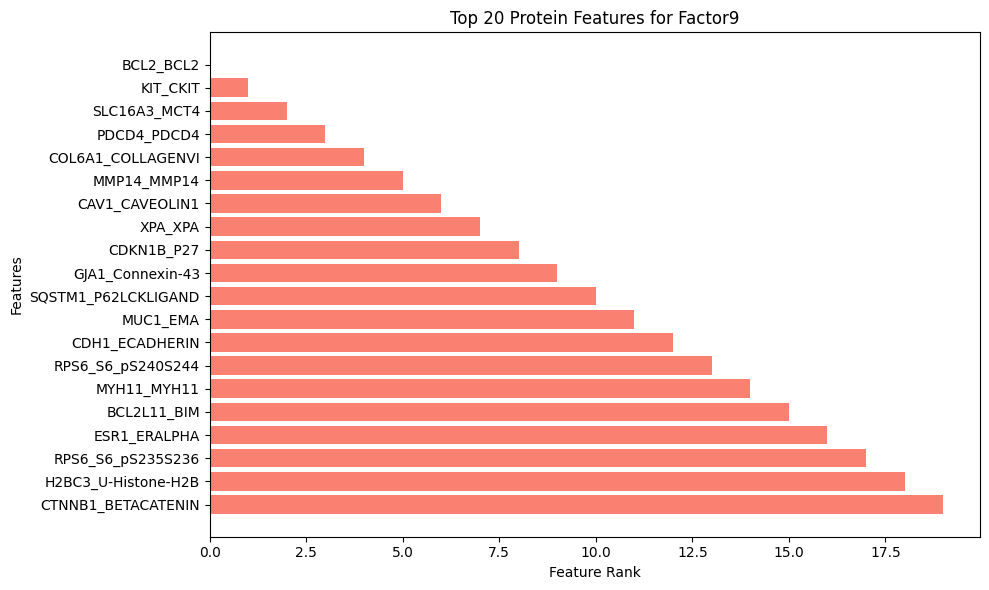

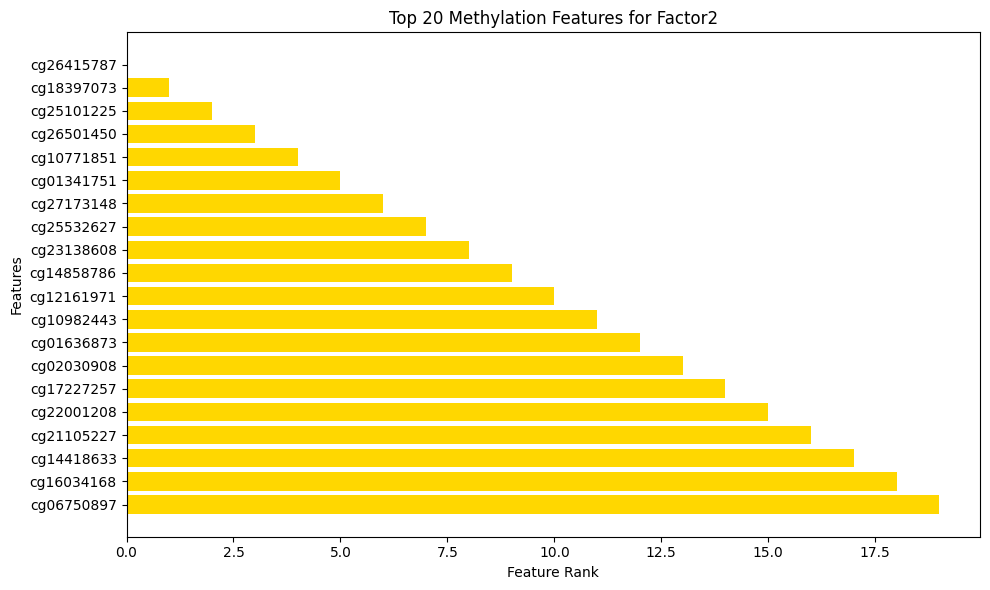

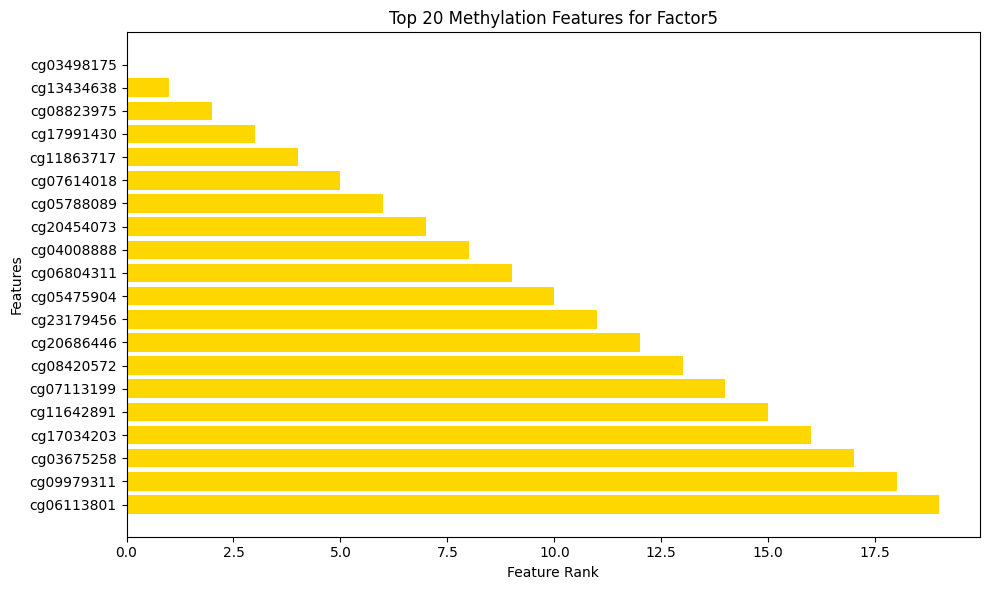

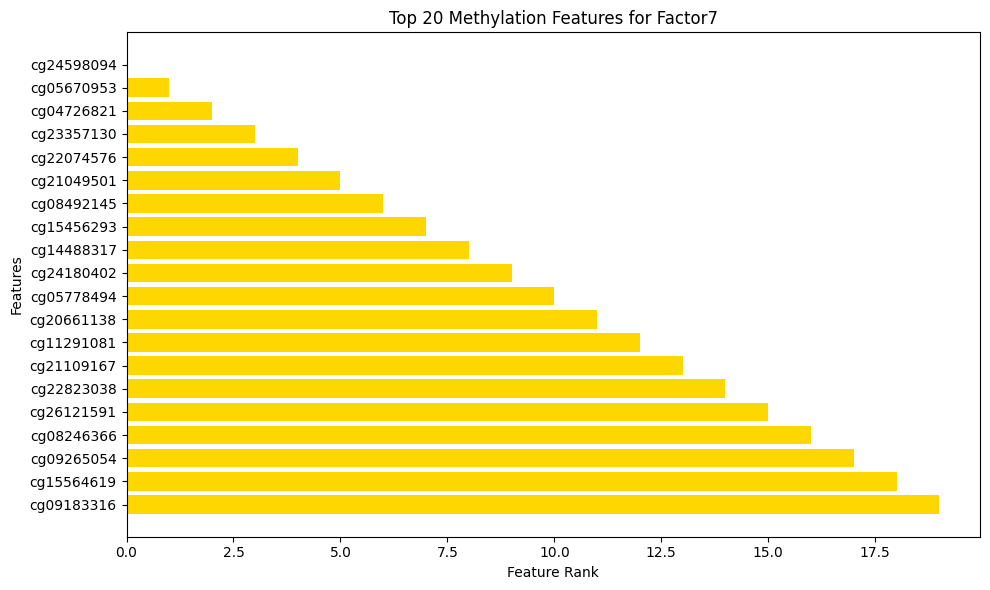

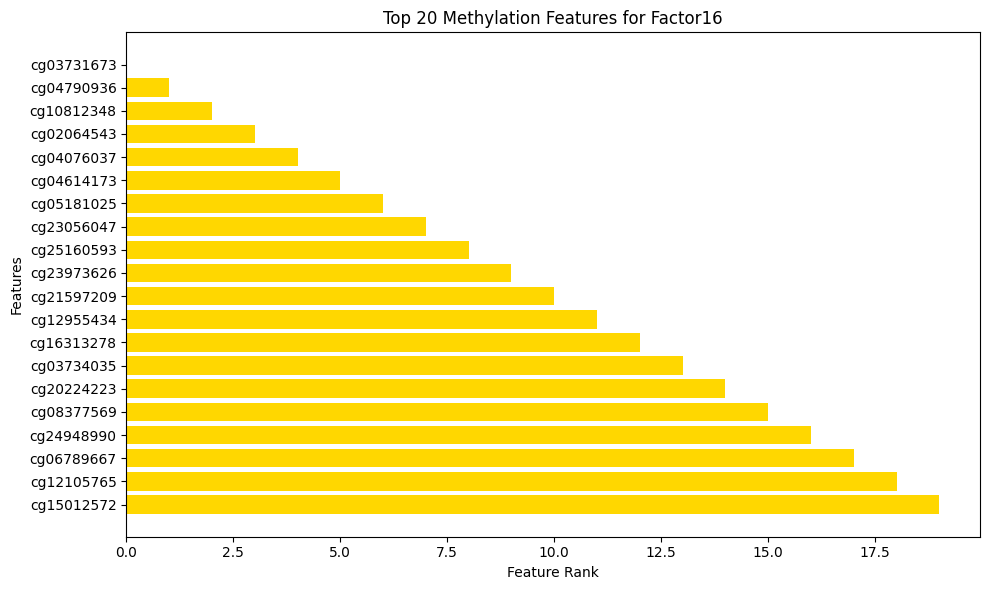

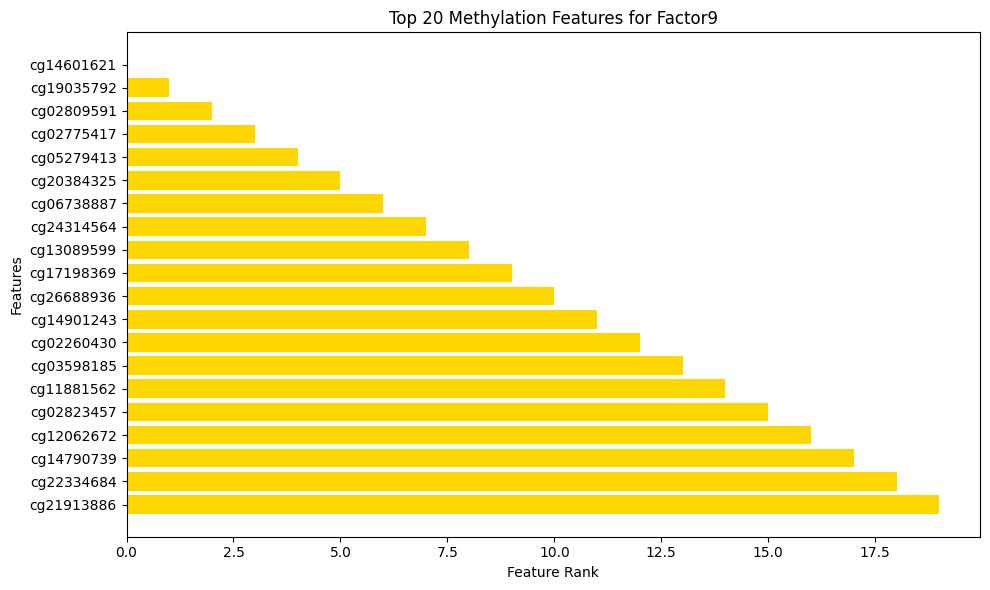

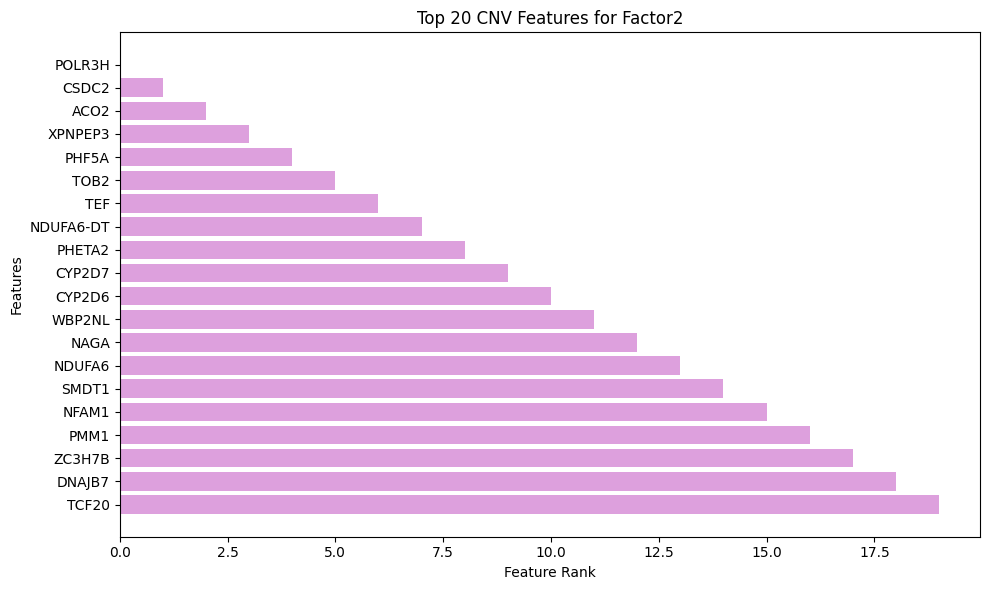

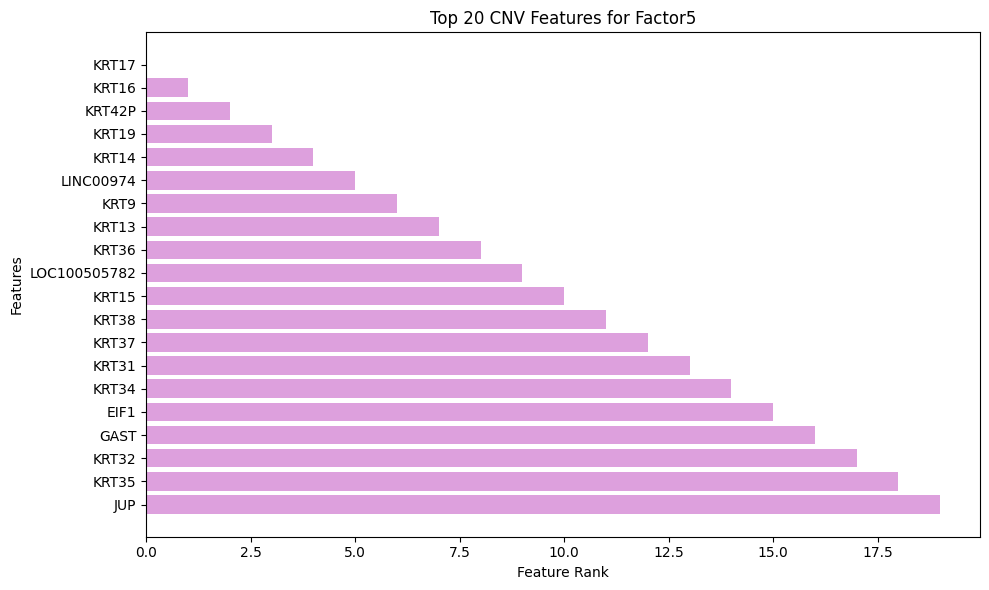

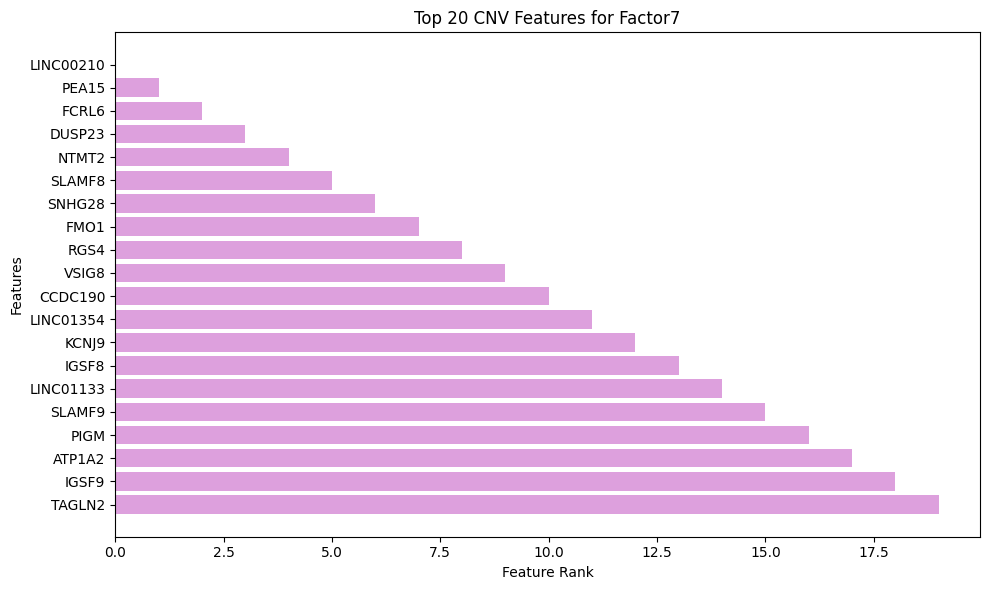

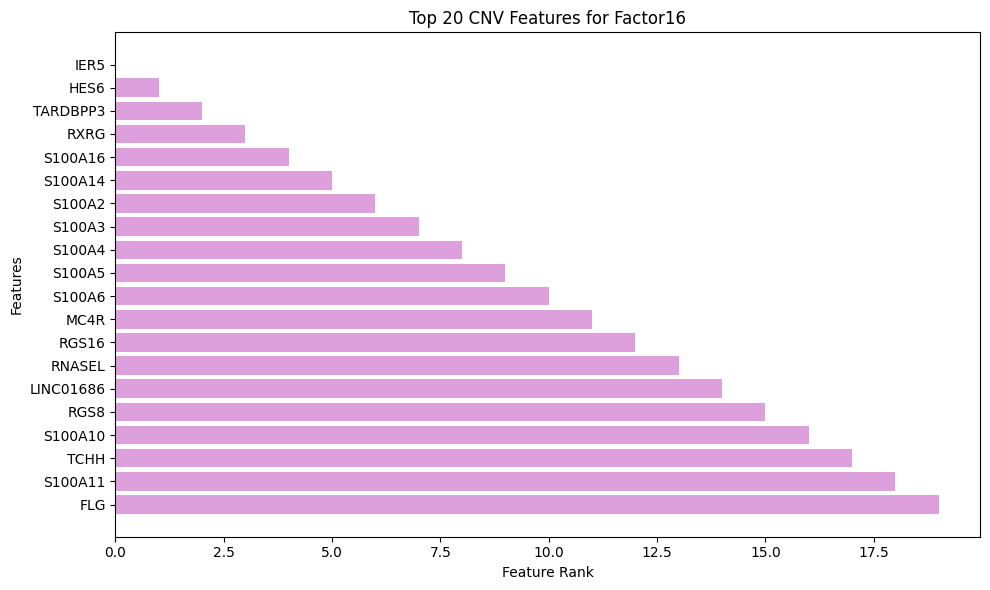

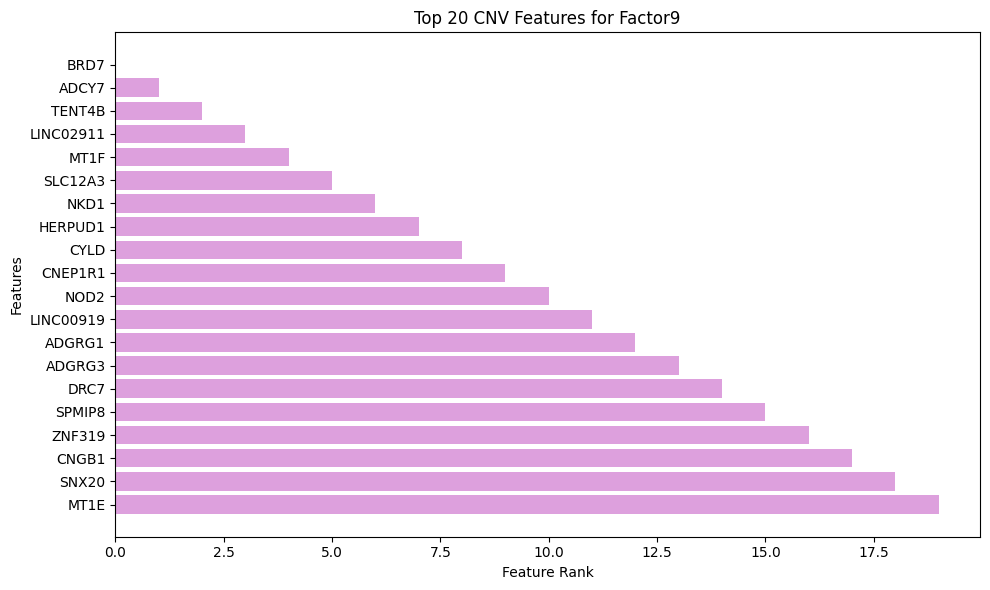

In [41]:
import matplotlib.pyplot as plt

def plot_top_features_bar(top_features, omics_name, top_n=20):
    # Define a color mapping for each omics type
    color_mapping = {
        "mRNA": "skyblue",
        "miRNA": "lightgreen",
        "Protein": "salmon",
        "Methylation": "gold",
        "CNV": "plum"
    }
    
    # Get the color for the current omics type
    bar_color = color_mapping.get(omics_name, "gray")  # Default to gray if omics_name is not in the mapping
    
    for factor, features in top_features.items():
        # Select the top N features for the current factor
        top_features_subset = features[:top_n]
        
        # Create a bar plot
        plt.figure(figsize=(10, 6))
        plt.barh(top_features_subset, range(len(top_features_subset)), color=bar_color)
        plt.gca().invert_yaxis()  # Invert y-axis to show the highest contributor at the top
        plt.title(f"Top {top_n} {omics_name} Features for {factor}")
        plt.xlabel("Feature Rank")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.savefig(f"top_{omics_name}_features_{factor}.png")
        plt.show()

#  top 20 features for mRNA
plot_top_features_bar(top_mrna_genes, "mRNA", top_n=20)

#  top 20 features for miRNA
plot_top_features_bar(top_mirna, "miRNA", top_n=20)

#  top 20 features for Protein
plot_top_features_bar(top_protiens, "Protein", top_n=20)

#  top 20 features for Methylation
plot_top_features_bar(top_methyl, "Methylation", top_n=20)

# top 20 features for CNV
plot_top_features_bar(top_cnv, "CNV", top_n=20)

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Function to plot top features for a given omics dataset
def plot_top_features(top_features_df, omics_name, factor_column='Factor10', abs_value_column='abs_value', top_n=20):
    """
    Plots the top features for a given omics dataset.

    Parameters:
    - top_features_df: DataFrame containing the top features.
    - omics_name: Name of the omics dataset (e.g., "mRNA", "Protein").
    - factor_column: Column name for the factor values.
    - abs_value_column: Column name for the absolute values.
    - top_n: Number of top features to plot.
    """
    # Sort the DataFrame by absolute value in descending order
    sorted_df = top_features_df.sort_values(by=abs_value_column, ascending=False).head(top_n)
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(data=sorted_df, x=abs_value_column, y='Unnamed: 0', palette='viridis')
    plt.title(f"Top {top_n} Features for {omics_name}")
    plt.xlabel("Absolute Contribution Value")
    plt.ylabel("Feature Name")
    plt.tight_layout()
    plt.show()

# Example usage for each omics dataset
plot_top_features(top_proteins, "Protein")
plot_top_features(top_genes, "mRNA")
plot_top_features(top_mirna, "miRNA")
plot_top_features(top_cnv, "CNV")
plot_top_features(top_methyl, "Methylation")

In [ ]:
miRNA_loadings['Factor1'].min()

In [ ]:
miRNA_loadings['Factor1'].max()

In [ ]:
miRNA_loadings.describe()

In [ ]:
methylation_loadings.describe()

In [ ]:
CNV_loadings.describe()

In [ ]:
protein_loadings.describe()

FEATURE SELECTION